# Airline Delay Cause Analysis (Jan. 2016- Oct. 2024)

## 1. Business Understanding

## Objective: Analyze the dataset “Airlines_Delay_Cause.csv” to identify the primary causes of flight delays and provide actionable recommendations to optimize flight operations for airlines and airports.

### A. What are the Best Performing and Worst Performing Airports and Airlines?
1. What is the overall percentage of flights arriving on time vs. delayed?
2. Which airlines (carriers) have the highest on-time performance?
3. Which airports experience the highest arrival delays?
4. Which airports experience the most delays because of nas (National Aviation System Delays - ATC Congestion, Runway Delays)

### B. What are the main causes of flight delays and how do they differ they differ depending on the airline, airport and season?
1. What are the main causes of flight delays?
2. How does Flight delays differ depending on the airline?
3. How does Flight delays differ depending on the airport?
4. How does Flight delays differ depending on the Season?

### C. Which airlines and airports experience the most cancellations and diversions and what are the underlying reasons?
1. Which airlines experience the most cancellations and diversions?
2. Which airports experience the most cancellations and diversions?
3. What are the seasonal trends in flight cancellations and diversions?


### D. How can airlines and airports optimise their operations to reduce delays and improve punctuality(Suggestions)?

# 2. Data Understanding

In [175]:
#import library 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import numpy as np
import folium

In [176]:
# Read csv file  and convert it into Dataframe. 
df = pd.read_csv('Airline_Delay_Cause.csv')
df_copy = df.copy()

In [177]:
df_copy.shape

(184616, 21)

This Dataset has 21 Columns (Variables) and 184616 Rows

In [179]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184616 entries, 0 to 184615
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 184616 non-null  int64  
 1   month                184616 non-null  int64  
 2   carrier              184616 non-null  object 
 3   carrier_name         184616 non-null  object 
 4   airport              184616 non-null  object 
 5   airport_name         184616 non-null  object 
 6   arr_flights          184273 non-null  float64
 7   arr_del15            184021 non-null  float64
 8   carrier_ct           184273 non-null  float64
 9   weather_ct           184273 non-null  float64
 10  nas_ct               184273 non-null  float64
 11  security_ct          184273 non-null  float64
 12  late_aircraft_ct     184273 non-null  float64
 13  arr_cancelled        184273 non-null  float64
 14  arr_diverted         184273 non-null  float64
 15  arr_delay        

In [180]:
df_copy.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')


###### In this Dataframe we have 2 columns with integer datatype, 4 columns with Object datataype and 14 columns with float datatype:

###### Datatype int: 'year', 'month'

###### Datatype object: 'carrier', 'carrier_name', 'airport', 'airport_name'

###### Datatype float :'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'

In [182]:
df_copy.describe()   # Gives the descriptive statistical info about Dataframe

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,184616.000000,184616.000000,184273.000000,184021.000000,184273.00000,184273.000000,184273.000000,184273.000000,184273.000000,184273.000000,184273.000000,184273.000000,184273.000000,184273.000000,184273.000000,184273.000000,184273.000000
mean,2020.268790,6.390725,321.043246,58.362573,18.52237,2.051394,16.812423,0.149467,20.747103,6.665160,0.762591,3929.397796,1354.027416,217.538153,815.177628,7.072762,1535.566127
std,2.373032,3.421198,919.884109,167.313709,48.30618,7.167776,56.251075,0.719283,66.787561,41.028202,3.406966,12570.497519,4327.519108,856.197545,3207.044215,41.261313,5246.599240
min,2016.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,3.000000,39.000000,5.000000,1.92000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,284.000000,88.000000,0.000000,27.000000,0.000000,52.000000
50%,2020.000000,6.000000,87.000000,15.000000,5.27000,0.210000,3.220000,0.000000,4.190000,1.000000,0.000000,895.000000,316.000000,11.000000,122.000000,0.000000,282.000000
75%,2022.000000,9.000000,211.000000,39.000000,14.39000,1.620000,9.580000,0.000000,12.920000,3.000000,1.000000,2551.000000,985.000000,133.000000,394.000000,0.000000,971.000000
max,2024.000000,12.000000,21977.000000,5544.000000,1886.58000,325.410000,1884.420000,58.690000,2588.130000,4951.000000,192.000000,648300.000000,321792.000000,64550.000000,139958.000000,3760.000000,279153.000000


#### Explanation of Each Column:

year & month:Data spans from 2016 to 2024.

arr_flights (Total arriving flights per record):
On average, there are 321 flights per record.
Maximum recorded flights in a single entry is 21,977.
Large standard deviation (919.88) suggests high variability in flight counts.


arr_del15 (Number of flights delayed by 15+ minutes):
Mean: 58 flights delayed per record.
Maximum: 5,544 flights delayed in one instance.


carrier_ct (Carrier-related delays):
Average carrier-related delay incidents: 18.5 per record.
Maximum carrier delay count: 1,886.58.
The high standard deviation (48.3) indicates significant variation in carrier delays.


weather_ct (Weather-related delays):
Mean: 2.05 delays per record.
Median (50%): 0.21 delays, indicating that weather is not a frequent cause of delays in most cases.
Maximum: 325.41 delays in a single entry, suggesting extreme weather events occur occasionally.


nas_ct (National Aviation System Delays - ATC Congestion, Runway Delays, etc.):
Mean: 16.8 delays per record.
Max: 1,884 delays in one record, indicating some major air traffic disruptions.


security_ct (Security-related delays):
Mean: 0.14 per record → very low security delays overall.
Max: 58.69 delays in a single entry, which could indicate a rare security issue like heightened security checks.


late_aircraft_ct (Delays due to late-arriving aircrafts):
Mean: 20.7 delays per record.
Max: 2,588 delays in one record, showing how one delay can cause a domino effect.


arr_cancelled (Number of flights canceled):
Mean: 6.67 flights canceled per record.
Max: 4,951 canceled flights in one entry, likely due to extreme weather or operational issues.


arr_diverted:
Mean: 0.76 diversions per record, indicating diversions are less frequent.
Max: 192 diversions in one record, a significant disruption that could be due to weather or operational issues.


arr_delay (Total Arrival Delay):
Mean: 3,929.40 minutes of delay per record.
Max: 648,300 minutes of delay in one record, which likely corresponds to a very large event (e.g., a nationwide weather event causing mass delays).
Std (12,570.50): A high standard deviation shows significant variation in delays.


carrier_delay (Carrier-Related Delay):
Mean: 1,354.03 minutes of delay per record, highlighting that carrier delays are a substantial cause of delay.
Max: 321,792 minutes in one record.
Std (4,327.52): Again, there's high variability, suggesting that some records have extremely large carrier delays.


weather_delay:
Mean: 217.54 minutes of weather-related delays.
Max: 64,550 minutes, which could be due to significant weather events such as snowstorms or hurricanes.
Std (856.20): A substantial spread, showing that while weather delays are generally low, they can sometimes be extreme.


nas_delay (National Aviation System Delay):
Mean: 815.18 minutes.
Max: 139,958 minutes, which likely indicates a major system-wide disruption, such as air traffic control issues or severe congestion.
Std (3,207.04): High variation, again indicating that delays are sometimes extreme.


security_delay:
Mean: 7.07 minutes, showing security delays are generally minimal.
Max: 3,760 minutes, though rare, suggesting extreme security-related disruptions.
Std (41.26): Low variability, confirming that security delays are typically brief.


late_aircraft_delay:
Mean: 1,535.57 minutes of delay, indicating this is a significant source of delay.
Max: 279,153 minutes, again suggesting large disruptions at certain times.
Std (5,246.60): High variation, with certain periods experiencing extreme delays.



In [184]:
# display the first few rows 
df_copy.head(2)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2024,10,OH,PSA Airlines Inc.,SGF,"Springfield, MO: Springfield-Branson National",119.0,16.0,5.50,0.0,...,0.0,6.90,0.0,0.0,1575.0,716.0,0.0,111.0,0.0,748.0
1,2024,10,OH,PSA Airlines Inc.,SHV,"Shreveport, LA: Shreveport Regional",92.0,12.0,4.56,0.0,...,0.0,1.52,0.0,0.0,372.0,174.0,0.0,166.0,0.0,32.0


#### Check for Null Values

In [186]:
#Check the count of nulls for each column available in dataframe
df_copy.isnull().sum()

year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            343
arr_del15              595
carrier_ct             343
weather_ct             343
nas_ct                 343
security_ct            343
late_aircraft_ct       343
arr_cancelled          343
arr_diverted           343
arr_delay              343
carrier_delay          343
weather_delay          343
nas_delay              343
security_delay         343
late_aircraft_delay    343
dtype: int64

##### In this dataframe we have 6 columns which have 0 Null Values, 13 columns which contains 343 Null values and 1 column which contains 595 Null Values

#### Check for duplicates in dataset

In [189]:
#To check duplicate in dataset(when all columns are same)
df_copy[df_copy.duplicated()]

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay


###### We do not have any Duplicate Rows or values in The Dataset

# 3. Data Preparation

#### Remove the null values from the dataframe

In [193]:
#Remove the null values from the dataframe
df_cleaned = df_copy.dropna(subset=['arr_del15'])

df_cleaned.isnull().sum()

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

#### Airlines to Parent companies mapping (In this dataset we have many Airline which operates under One Parent Company)

In [195]:
print(df_cleaned["carrier_name"].value_counts().count())
print(df_cleaned["airport"].value_counts().count())

38
391


In [196]:
# Define the mapping of airlines to parent companies
airline_parent_mapping = {
"SkyWest Airlines Inc.": "SkyWest, Inc.",
"Envoy Air": "American Airlines Group",
"Delta Air Lines Network": "Delta Air Lines, Inc.",
"Delta Air Lines Inc.": "Delta Air Lines, Inc.",
"Allegiant Air": "Allegiant Travel Company",
"American Airlines Network": "American Airlines Group",
"Endeavor Air Inc.": "Delta Air Lines, Inc.",
"United Air Lines Network": "United Airlines, Inc.",
"Southwest Airlines": "Southwest Airlines Co.",
"Mesa Airlines Inc.": "Mesa Air Group, Inc.",
"PSA Airlines Inc.": "American Airlines Group",
"Frontier Airlines": "Indigo Partners ",
"Republic Airline": "American Airlines Group",
"JetBlue Airways": "JetBlue Airways Corporation",
"Alaska Airlines Network": "Alaska Air Group,Inc.",
"ExpressJet Airlines Inc.": "SkyWest, Inc.",
"Air Wisconsin Airlines Corp": "American Airlines Group",
"Piedmont Airlines": "American Airlines Group",
"GoJet Airlines LLC d/b/a United Express": "Trans States Holdings",
"Spirit Airlines": "Spirit Airlines, Inc.",
"Horizon Air": "Alaska Air Group,Inc.",
"Commutair Aka Champlain Enterprises, Inc.": "Mosaic Aviation",
"American Airlines Inc.": "American Airlines Group",
"United Air Lines Inc.": "United Airlines, Inc.",
"Southwest Airlines Co.": "Southwest Airlines Co.",
"Trans States Airlines": "American Airlines Group",
"Alaska Airlines Inc.": "Alaska Air Group,Inc.",
"Hawaiian Airlines Network": "Hawaiian Holdings, Inc.",
"ExpressJet Airlines LLC": "SkyWest, Inc.",
"CommuteAir LLC dba CommuteAir": "Mesa Air Group, Inc.",
"Frontier Airlines Inc.": "Indigo Partners ",
"Compass Airlines": "Trans States Holdings",
"Spirit Airlines": "Spirit Airlines, Inc.",
"Virgin America": "Alaska Air Group,Inc.",
"Hawaiian Airlines Inc.": "Hawaiian Holdings, Inc.",
"Empire Airlines Inc.": "Empire Airlines, Inc.",
"Peninsula Airways Inc.": "Ravn Alaska",
"Cape Air": "Cape Air, Inc.",
"Spirit Air Lines": "Spirit Airlines, Inc."
}


# Add a new column "Parent Company" by mapping the Airline to the parent company

df_cleaned = df_cleaned.assign(Parent_Company=df_cleaned['carrier_name'].map(airline_parent_mapping))

###### Here we have mapped e.g Envoy Air", "American Airlines Network", "PSA Airlines Inc.","Air Wisconsin Airlines Corp","Republic Airline"- to The ----"American Airlines Group"

#### Airport to US States/Territories mapping

In [199]:
# Define the mapping of airport to US States/Territories
airport_to_state_mapping = {
    "ABE": "Pennsylvania",
    "ABI": "Texas",
    "ABQ": "New Mexico",
    "ABR": "South Dakota",
    "ABY": "Georgia",
    "ACK": "Massachusetts",
    "ACT": "Texas",
    "ACV": "California",
    "ACY": "New Jersey",
    "ADK": "Alaska",
    "ADQ": "Alaska",
    "AEX": "Louisiana",
    "AGS": "Georgia",
    "AKN": "Alaska",
    "ALB": "New York",
    "ALO": "Iowa",
    "ALS": "Colorado",
    "ALW": "Washington",
    "AMA": "Texas",
    "ANC": "Alaska",
    "APN": "Michigan",
    "ART": "New York",
    "ASE": "Colorado",
    "ATL": "Georgia",
    "ATW": "Wisconsin",
    "ATY": "South Dakota",
    "AUS": "Texas",
    "AVL": "North Carolina",
    "AVP": "Pennsylvania",
    "AZA": "Arizona",
    "AZO": "Michigan",
    "BDL": "Connecticut",
    "BET": "Alaska",
    "BFF": "Nebraska",
    "BFL": "California",
    "BFM": "Alabama",
    "BGM": "New York",
    "BGR": "Maine",
    "BHM": "Alabama",
    "BIH": "Nevada",
    "BIL": "Montana",
    "BIS": "North Dakota",
    "BJI": "Minnesota",
    "BKG": "Nebraska",
    "BLI": "Washington",
    "BLV": "Illinois",
    "BMI": "Illinois",
    "BNA": "Tennessee",
    "BOI": "Idaho",
    "BOS": "Massachusetts",
    "BPT": "Texas",
    "BQK": "Georgia",
    "BQN": "Puerto Rico",
    "BRD": "Minnesota",
    "BRO": "Texas",
    "BRW": "Alaska",
    "BTM": "Montana",
    "BTR": "Louisiana",
    "BTV": "Vermont",
    "BUF": "New York",
    "BUR": "California",
    "BWI": "Maryland",
    "BZN": "Montana",
    "CAE": "South Carolina",
    "CAK": "Ohio",
    "CDB": "Alaska",
    "CDC": "Utah",
    "CDV": "Alaska",
    "CGI": "Missouri",
    "CHA": "Tennessee",
    "CHO": "Virginia",
    "CHS": "South Carolina",
    "CID": "Iowa",
    "CIU": "Michigan",
    "CKB": "West Virginia",
    "CLE": "Ohio",
    "CLL": "Texas",
    "CLT": "North Carolina",
    "CMH": "Ohio",
    "CMI": "Illinois",
    "CMX": "Michigan",
    "CNY": "Wyoming",
    "COD": "Wyoming",
    "COS": "Colorado",
    "COU": "Missouri",
    "CPR": "Wyoming",
    "CRP": "Texas",
    "CRW": "West Virginia",
    "CSG": "Georgia",
    "CVG": "Kentucky",
    "CWA": "Wisconsin",
    "CYS": "Wyoming",
    "DAB": "Florida",
    "DAL": "Texas",
    "DAY": "Ohio",
    "DBQ": "Iowa",
    "DCA": "District of Columbia",
    "DDC": "Kansas",
    "DEC": "Illinois",
    "DEN": "Colorado",
    "DFW": "Texas",
    "DHN": "Alabama",
    "DIK": "North Dakota",
    "DLG": "Alaska",
    "DLH": "Minnesota",
    "DRO": "Colorado",
    "DRT": "Texas",
    "DSM": "Iowa",
    "DTW": "Michigan",
    "DUT": "Alaska",
    "DVL": "North Dakota",
    "EAR": "Texas",
    "EAT": "Washington",
    "EAU": "Wisconsin",
    "ECP": "Florida",
    "EFD": "Texas",
    "EGE": "Colorado",
    "EKO": "Nevada",
    "ELM": "New York",
    "ELP": "Texas",
    "ENV": "Nevada",
    "ERI": "Pennsylvania",
    "ESC": "Michigan",
    "EUG": "Oregon",
    "EVV": "Indiana",
    "EWN": "North Carolina",
    "EWR": "New Jersey",
    "EYW": "Florida",
    "FAI": "Alaska",
    "FAR": "North Dakota",
    "FAT": "California",
    "FAY": "North Carolina",
    "FCA": "Montana",
    "FLG": "Arizona",
    "FLL": "Florida",
    "FLO": "South Carolina",
    "FNL": "Colorado",
    "FNT": "Michigan",
    "FOD": "Iowa",
    "FSD": "South Dakota",
    "FSM": "Arkansas",
    "FWA": "Indiana",
    "GCC": "Wyoming",
    "GCK": "Kansas",
    "GEG": "Washington",
    "GFK": "North Dakota",
    "GGG": "Texas",
    "GJT": "Colorado",
    "GNV": "Florida",
    "GPT": "Mississippi",
    "GRB": "Wisconsin",
    "GRI": "Nebraska",
    "GRK": "Texas",
    "GRR": "Michigan",
    "GSO": "North Carolina",
    "GSP": "South Carolina",
    "GST": "Alaska",
    "GTF": "Montana",
    "GTR": "Mississippi",
    "GUC": "Colorado",
    "GUM": "Guam",
    "HDN": "Colorado",
    "HGR": "Maryland",
    "HHH": "South Carolina",
    "HIB": "Minnesota",
    "HLN": "Montana",
    "HNL": "Hawaii",
    "HOB": "New Mexico",
    "HOU": "Texas",
    "HPN": "New York",
    "HRL": "Texas",
    "HSV": "Alabama",
    "HTS": "West Virginia",
    "HVN": "Connecticut",
    "HYA": "Massachusetts",
    "HYS": "Kansas",
    "IAD": "Virginia",
    "IAG": "New York",
    "IAH": "Texas",
    "ICT": "Kansas",
    "IDA": "Idaho",
    "IFP": "Arizona",
    "ILG": "Delaware",
    "ILM": "North Carolina",
    "IMT": "Michigan",
    "IND": "Indiana",
    "INL": "Minnesota",
    "IPT": "Pennsylvania",
    "ISN": "North Dakota",
    "ISP": "New York",
    "ITH": "New York",
    "ITO": "Hawaii",
    "JAC": "Wyoming",
    "JAN": "Mississippi",
    "JAX": "Florida",
    "JFK": "New York",
    "JHM": "Hawaii",
    "JLN": "Missouri",
    "JMS": "North Dakota",
    "JNU": "Alaska",
    "JST": "Pennsylvania",
    "KOA": "Hawaii",
    "KTN": "Alaska",
    "LAN": "Michigan",
    "LAR": "Wyoming",
    "LAS": "Nevada",
    "LAW": "Oklahoma",
    "LAX": "California",
    "LBB": "Texas",
    "LBE": "Pennsylvania",
    "LBF": "Nebraska",
    "LBL": "Kansas",
    "LCH": "Louisiana",
    "LCK": "Ohio",
    "LEX": "Kentucky",
    "LFT": "Louisiana",
    "LGA": "New York",
    "LGB": "California",
    "LIH": "Hawaii",
    "LIT": "Arkansas",
    "LNK": "Nebraska",
    "LNY": "California",
    "LRD": "Texas",
    "LSE": "Wisconsin",
    "LWB": "West Virginia",
    "LWS": "Idaho",
    "LYH": "Virginia",
    "MAF": "Texas",
    "MBS": "Michigan",
    "MCI": "Missouri",
    "MCO": "Florida",
    "MCW": "Iowa",
    "MDT": "Pennsylvania",
    "MDW": "Illinois",
    "MEI": "Mississippi",
    "MEM": "Tennessee",
    "MFE": "Texas",
    "MFR": "Oregon",
    "MGM": "Alabama",
    "MHK": "Kansas",
    "MHT": "New Hampshire",
    "MIA": "Florida",
    "MKE": "Wisconsin",
    "MKG": "Michigan",
    "MKK": "Hawaii",
    "MLB": "Florida",
    "MLI": "Illinois",
    "MLU": "Louisiana",
    "MMH": "California",
    "MOB": "Alabama",
    "MOT": "North Dakota",
    "MQT": "Michigan",
    "MRY": "California",
    "MSN": "Wisconsin",
    "MSO": "Montana",
    "MSP": "Minnesota",
    "MSY": "Louisiana",
    "MTJ": "Colorado",
    "MVY": "Massachusetts",
    "MYR": "South Carolina",
    "OAJ": "North Carolina",
    "OAK": "California",
    "OGD": "Utah",
    "OGG": "Hawaii",
    "OGS": "New York",
    "OKC": "Oklahoma",
    "OMA": "Nebraska",
    "OME": "Alaska",
    "ONT": "California",
    "ORD": "Illinois",
    "ORF": "Virginia",
    "ORH": "Massachusetts",
    "OTH": "Oregon",
    "OTZ": "Alaska",
    "OWB": "Kentucky",
    "PAE": "Washington",
    "PAH": "Kentucky",
    "PBG": "New York",
    "PBI": "Florida",
    "PDX": "Oregon",
    "PGD": "Florida",
    "PGV": "North Carolina",
    "PHF": "Virginia",
    "PHL": "Pennsylvania",
    "PHX": "Arizona",
    "PIA": "Illinois",
    "PIB": "Mississippi",
    "PIE": "Florida",
    "PIH": "Idaho",
    "PIR": "South Dakota",
    "PIT": "Pennsylvania",
    "PLN": "Michigan",
    "PNS": "Florida",
    "PPG": "American Samoa",
    "PQI": "Maine",
    "PRC": "Arizona",
    "PSC": "Washington",
    "PSE": "Puerto Rico",
    "PSG": "Alaska",
    "PSM": "New Hampshire",
    "PSP": "California",
    "PUB": "Colorado",
    "PUW": "Washington",
    "PVD": "Rhode Island",
    "PVU": "Utah",
    "PWM": "Maine",
    "RAP": "South Dakota",
    "RDD": "California",
    "RDM": "Oregon",
    "RDU": "North Carolina",
    "RFD": "Illinois",
    "RHI": "Wisconsin",
    "RIC": "Virginia",
    "RIW": "Wyoming",
    "RKS": "Wyoming",
    "RNO": "Nevada",
    "ROA": "Virginia",
    "ROC": "New York",
    "ROP": "Guam",
    "ROW": "New Mexico",
    "RST": "Minnesota",
    "RSW": "Florida",
    "SAF": "New Mexico",
    "SAN": "California",
    "SAT": "Texas",
    "SAV": "Georgia",
    "SBA": "California",
    "SBN": "Indiana",
    "SBP": "California",
    "SBY": "Maryland",
    "SCC": "Alaska",
    "SCE": "Pennsylvania",
    "SCK": "California",
    "SDF": "Kentucky",
    "SEA": "Washington",
    "SFB": "Florida",
    "SFO": "California",
    "SGF": "Missouri",
    "SGU": "Utah",
    "SHD": "Virginia",
    "SHR": "Wyoming",
    "SHV": "Louisiana",
    "SIT": "Alaska",
    "SJC": "California",
    "SJT": "Texas",
    "SJU": "Puerto Rico",
    "SLC": "Utah",
    "SLN": "Kansas",
    "SMF": "California",
    "SMX": "California",
    "SNA": "California",
    "SPI": "Illinois",
    "SPN": "Northern Mariana Islands",
    "SPS": "Texas",
    "SRQ": "Florida",
    "STC": "Minnesota",
    "STL": "Missouri",
    "STS": "California",
    "STT": "U.S. Virgin Islands",
    "STX": "U.S. Virgin Islands",
    "SUN": "Idaho",
    "SUX": "Iowa",
    "SWF": "New York",
    "SWO": "Oklahoma",
    "SYR": "New York",
    "TBN": "Missouri",
    "TKI": "Texas",
    "TLH": "Florida",
    "TOL": "Ohio",
    "TPA": "Florida",
    "TRI": "Tennessee",
    "TTN": "New Jersey",
    "TUL": "Oklahoma",
    "TUS": "Arizona",
    "TVC": "Michigan",
    "TWF": "Idaho",
    "TXK": "Texas",
    "TYR": "Texas",
    "TYS": "Tennessee",
    "UIN": "Illinois",
    "USA": "American Samoa",
    "UST": "American Samoa",
    "VCT": "Texas",
    "VEL": "Texas",
    "VLD": "Georgia",
    "VPS": "Florida",
    "WRG": "Alaska",
    "WYS": "Montana",
    "XNA": "Arkansas",
    "XWA": "North Dakota",
    "YAK": "Alaska",
    "YKM": "Washington",
    "YNG": "Ohio",
    "YUM": "Arizona"
}

# Add a new column "Airport_State" by mapping the Airport to the US States/Territories
df_cleaned.loc[:, 'Airport_State'] = df_cleaned['airport'].map(airport_to_state_mapping)


##### Here each Airport is mapped to an corresponding State. 

#### Create New column date from avialble year,month column combination to do the Analysis over time.

In [202]:
# Create a new 'date' column from 'year' and 'month' columns, defaulting the day to 1
df_cleaned['date'] = pd.to_datetime(df_cleaned[['year', 'month']].assign(day=1), format='%d-%m-%Y')

In [203]:
df_cleaned.shape

(184021, 24)

In [204]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184021 entries, 0 to 184615
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   year                 184021 non-null  int64         
 1   month                184021 non-null  int64         
 2   carrier              184021 non-null  object        
 3   carrier_name         184021 non-null  object        
 4   airport              184021 non-null  object        
 5   airport_name         184021 non-null  object        
 6   arr_flights          184021 non-null  float64       
 7   arr_del15            184021 non-null  float64       
 8   carrier_ct           184021 non-null  float64       
 9   weather_ct           184021 non-null  float64       
 10  nas_ct               184021 non-null  float64       
 11  security_ct          184021 non-null  float64       
 12  late_aircraft_ct     184021 non-null  float64       
 13  arr_cancelled      

In [205]:
df_cleaned.head(2)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Parent_Company,Airport_State,date
0,2024,10,OH,PSA Airlines Inc.,SGF,"Springfield, MO: Springfield-Branson National",119.0,16.0,5.50,0.0,...,0.0,1575.0,716.0,0.0,111.0,0.0,748.0,American Airlines Group,Missouri,2024-10-01
1,2024,10,OH,PSA Airlines Inc.,SHV,"Shreveport, LA: Shreveport Regional",92.0,12.0,4.56,0.0,...,0.0,372.0,174.0,0.0,166.0,0.0,32.0,American Airlines Group,Louisiana,2024-10-01


In [206]:
df_cleaned.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,date
count,184021.000000,184021.000000,184021.000000,184021.000000,184021.000000,184021.000000,184021.000000,184021.000000,184021.000000,184021.000000,184021.000000,184021.000000,184021.000000,184021.000000,184021.000000,184021.000000,184021.000000,184021
mean,2020.269073,6.393270,321.470995,58.362573,18.547734,2.054203,16.835446,0.149672,20.775514,6.662506,0.763527,3934.778748,1355.881633,217.836051,816.293939,7.082447,1537.668945,2020-09-19 02:18:50.544883712
min,2016.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016-01-01 00:00:00
25%,2018.000000,3.000000,40.000000,5.000000,1.930000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,285.000000,89.000000,0.000000,27.000000,0.000000,53.000000,2018-11-01 00:00:00
50%,2020.000000,6.000000,88.000000,15.000000,5.280000,0.210000,3.230000,0.000000,4.200000,1.000000,0.000000,898.000000,317.000000,11.000000,122.000000,0.000000,283.000000,2020-10-01 00:00:00
75%,2022.000000,9.000000,212.000000,39.000000,14.420000,1.620000,9.600000,0.000000,12.950000,3.000000,1.000000,2555.000000,987.000000,133.000000,394.000000,0.000000,973.000000,2022-10-01 00:00:00
max,2024.000000,12.000000,21977.000000,5544.000000,1886.580000,325.410000,1884.420000,58.690000,2588.130000,4951.000000,192.000000,648300.000000,321792.000000,64550.000000,139958.000000,3760.000000,279153.000000,2024-10-01 00:00:00
std,2.375032,3.422473,920.440871,167.313709,48.334378,7.172280,56.286134,0.719754,66.828859,41.051786,3.409177,12578.260075,4330.190891,856.745718,3209.097378,41.288725,5249.882455,NaN


##### After data preprocessing and cleansing,the  final modified dataframe has 184021 entries and 24 columns.

In [208]:

df_grouped = df_cleaned.groupby(["year", "month"])["arr_flights"].sum().reset_index()

# Filter where year is 2020
df_2020 = df_grouped[df_grouped['year'] == 2020]

# Display the result
print(df_2020)


    year  month  arr_flights
48  2020      1     660554.0
49  2020      2     623101.0
50  2020      3     701262.0
51  2020      4     329412.0
52  2020      5     192153.0
53  2020      6     237261.0
54  2020      7     370855.0
55  2020      8     398469.0
56  2020      9     345294.0
57  2020     10     374538.0
58  2020     11     389583.0
59  2020     12     397802.0


# 4. Modeling

### ▪ What are the Best Performing and Worst Performing Airports and Airlines?
1. What is the overall percentage of flights arriving on time vs. delayed?
2. Which airlines (carriers) have the highest on-time performance?
3. Which airports experience the highest arrival delays?
4. Which airports experience the most delays because of nas (National Aviation System Delays - ATC Congestion, Runway Delays)

# 1. What is the overall percentage of flights arriving on time vs. delayed?

In [212]:
#Calculate the operations count and different delays count to check the operational efficiency
total_operations_count = df_cleaned["arr_flights"].sum()
cancelled_operation_count = df_cleaned["arr_cancelled"].sum()
diverted_operation_count = df_cleaned["arr_diverted"].sum()
delayed_operation_count = df_cleaned["arr_del15"].sum()
Ontime_operations_count = total_operations_count -(cancelled_operation_count+diverted_operation_count+delayed_operation_count)

Ontime_arrival_percentage = (Ontime_operations_count/total_operations_count)*100
cancelled_operation_percentage = (cancelled_operation_count/total_operations_count)*100
diverted_operation_percentage = (diverted_operation_count/total_operations_count)*100
delayed_operation_percentage = (delayed_operation_count/total_operations_count)*100

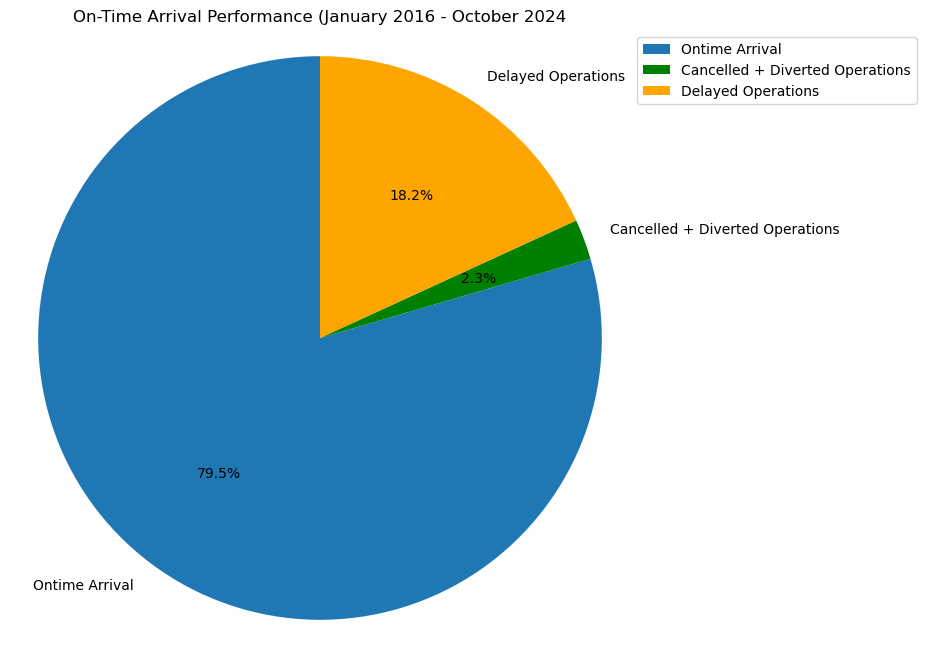

In [213]:
# Plot the ontime arrival percentage, cancelled, diverted and delayed percentage in pie chart
labels = [
    'Ontime Arrival', 
    'Cancelled + Diverted Operations', 
    'Delayed Operations ', 
    ]
sizes = [
    Ontime_arrival_percentage, 
    cancelled_operation_percentage+diverted_operation_percentage, 
    delayed_operation_percentage, 
    
]

# Plotting the pie chart
plt.figure(figsize=(8, 8))
custom_colors = ['#1f77b4', 'green', 'orange'] 
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=custom_colors)
plt.title('On-Time Arrival Performance (January 2016 - October 2024')
plt.legend(labels=labels, loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


##### Flight Service Performance Overview

##### On-Time Arrivals: 79.5%
##### Delayed Flights: 18.15%
##### Diverted Flights: 0.24%
##### Cancelled Flights: 2.07%
##### Approximately 80% of flights arrive on time, while about 20% face delays, diversions, or cancellations.

## 2. Which airlines (carriers) have the highest on-time performance? Which airlines experience the highest arrival delays?

In [216]:
total_operation_count = df_cleaned.groupby('Parent_Company')['arr_flights'].sum().sort_values(ascending=False).sum()
top10_operation_count = df_cleaned.groupby('Parent_Company')['arr_flights'].sum().sort_values(ascending=False).head(10).sum()
top10_operation_percentage = top10_operation_count/total_operation_count *100
print(top10_operation_percentage)

96.09772496140552


#### We are limiting our analysis to top 10 carriers based on the number of flights,as they contribute to 96% of overall Airtraffic.

In [218]:
#Group by Airlines to calculate the ontime arrival percentage,delay percentage and percentage of each type of delay

grouped_carrier_data=df_cleaned.groupby('Parent_Company')[['arr_flights','arr_cancelled','arr_diverted','arr_del15','carrier_ct','weather_ct','nas_ct','security_ct','late_aircraft_ct']].sum().sort_values(by ='arr_flights',ascending=False).head(10).reset_index()
grouped_carrier_data
grouped_carrier_data['Ontime_operations'] = grouped_carrier_data['arr_flights'] - (
    grouped_carrier_data['arr_cancelled'] + 
    grouped_carrier_data['arr_diverted'] + 
    grouped_carrier_data['arr_del15']
)

grouped_carrier_data['Ontime_arrival_percentage'] = (grouped_carrier_data['Ontime_operations'] / grouped_carrier_data['arr_flights']) * 100
grouped_carrier_data['delayed_operations_percentage'] = grouped_carrier_data['arr_del15'] /grouped_carrier_data['arr_flights']* 100
grouped_carrier_data['carrier_delay_percentage'] = grouped_carrier_data['carrier_ct'] /grouped_carrier_data['arr_del15']* 100
grouped_carrier_data['weather_delay_percentage'] = grouped_carrier_data['weather_ct'] /grouped_carrier_data['arr_del15']* 100
grouped_carrier_data['nas_delay_percentage'] = grouped_carrier_data['nas_ct'] /grouped_carrier_data['arr_del15']* 100
grouped_carrier_data['security_delay_percentage']= grouped_carrier_data['security_ct'] /grouped_carrier_data['arr_del15']* 100
grouped_carrier_data['late_arrival_percentage']= grouped_carrier_data['late_aircraft_ct'] /grouped_carrier_data['arr_del15']* 100
grouped_carrier_data
grouped_carrier_data_sorted = grouped_carrier_data[0:10].sort_values(by = "delayed_operations_percentage",ascending = False).reset_index()
grouped_carrier_data_sorted
grouped_carrier_data_sorted_1 = grouped_carrier_data[0:10].sort_values(by = "Ontime_arrival_percentage",ascending = False).reset_index()
grouped_carrier_data_sorted_1

,index,Parent_Company,arr_flights,arr_cancelled,arr_diverted,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,Ontime_operations,Ontime_arrival_percentage,delayed_operations_percentage,carrier_delay_percentage,weather_delay_percentage,nas_delay_percentage,security_delay_percentage,late_arrival_percentage
0,2,"Delta Air Lines, Inc.",9420554.0,119396.0,18333.0,1315041.0,464573.04,51054.12,422005.83,1563.18,375844.15,7967784.0,84.578720,13.959275,35.327647,3.882322,32.090698,0.118869,28.580413
1,5,"Alaska Air Group,Inc.",2706426.0,44229.0,6930.0,459682.0,116588.23,11854.23,184978.03,2856.65,143405.54,2195585.0,81.124886,16.984835,25.362801,2.578789,40.240434,0.621440,31.196684
2,3,"SkyWest, Inc.",7515436.0,149827.0,22930.0,1270022.0,489417.10,79921.01,292575.73,2035.84,406073.98,6072657.0,80.802458,16.898847,38.536112,6.292884,23.037060,0.160300,31.973775
3,4,"United Airlines, Inc.",5123561.0,84489.0,13277.0,937660.0,270899.41,31908.78,335025.17,167.65,299659.00,4088135.0,79.790892,18.300943,28.891006,3.403022,35.729920,0.017880,31.958172
4,0,American Airlines Group,14424398.0,362992.0,36272.0,2681613.0,764134.67,110955.82,840963.47,7005.02,958554.11,11343521.0,78.641209,18.590814,28.495337,4.137652,31.360359,0.261224,35.745430
5,1,Southwest Airlines Co.,11307468.0,254948.0,22457.0,2143155.0,693283.14,36341.60,420536.76,6547.05,986447.05,8886908.0,78.593262,18.953447,32.348717,1.695706,19.622321,0.305487,46.027798
6,9,"Mesa Air Group, Inc.",1162124.0,34359.0,3164.0,219078.0,74679.71,12703.61,54477.64,369.24,76846.57,905523.0,77.919654,18.851517,34.088183,5.798670,24.866778,0.168543,35.077265
7,7,"Spirit Airlines, Inc.",1721476.0,37746.0,3123.0,370978.0,91296.34,10519.40,178943.55,3574.15,86644.47,1309629.0,76.075937,21.549995,24.609637,2.835586,48.235623,0.963440,23.355690
8,8,Indigo Partners,1188809.0,26148.0,1785.0,303624.0,86193.82,4467.28,93845.90,0.00,119112.93,857252.0,72.110154,25.540183,28.388342,1.471320,30.908591,0.000000,39.230407
9,6,JetBlue Airways Corporation,2278677.0,53015.0,7223.0,587346.0,213946.76,10487.22,164631.70,1974.93,196305.14,1631093.0,71.580702,25.775746,36.426018,1.785527,28.029764,0.336246,33.422402


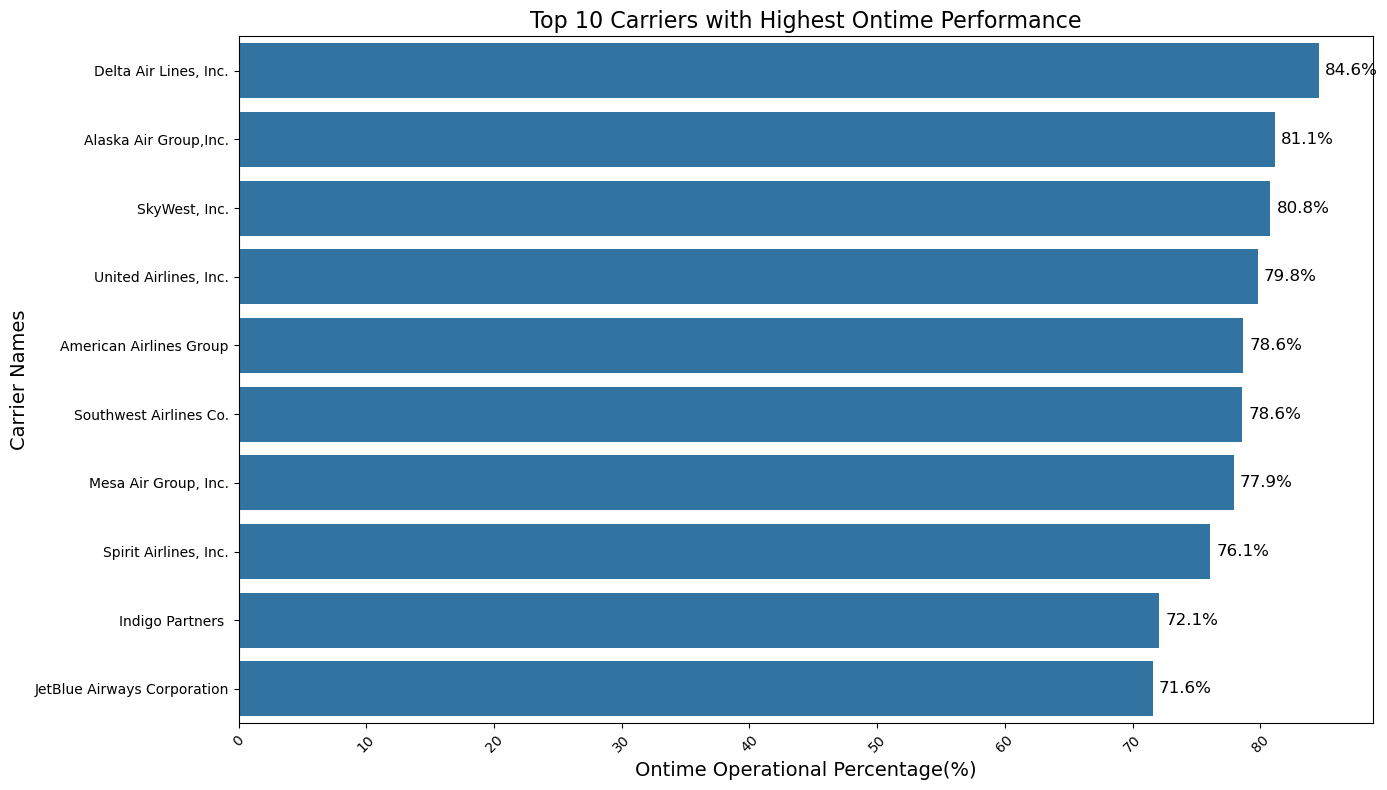

In [219]:
#Plot graph to show the Aircarries with highest Ontime Operational Percentage
# Set figure size

# Set figure size
plt.figure(figsize=(14, 8))

# Create the bar plot for on-time arrival percentages
sns.barplot(x='Ontime_arrival_percentage', y='Parent_Company', data=grouped_carrier_data_sorted_1, )

# Add titles and labels
plt.title('Top 10 Carriers with Highest Ontime Performance', fontsize=16)
plt.xlabel('Ontime Operational Percentage(%)', fontsize=14)
plt.ylabel('Carrier Names', fontsize=14)

# Add percentage labels on top of each bar
for i in range(len(grouped_carrier_data)):
    plt.text(
        x=grouped_carrier_data_sorted_1['Ontime_arrival_percentage'].iloc[i] + 0.5,  # Position the label slightly to the right of the bar
        y=i,  # Position the label at the center of the bar
        s=f'{grouped_carrier_data_sorted_1["Ontime_arrival_percentage"].iloc[i]:.1f}%',  # Format the label as a percentage
        va='center', 
        ha='left', 
        color='black',  
        fontsize=12  
    )

# Rotate x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


### From the above Graph we can say that : 
##### 1. Delta Airline Inc.  84 %  On Time Performance . From 100 Flights by this Airline 85 Flights reach at the Destination on Scheduled Time .
##### 2 Alaska Air Group  : 81%  On Time Performance
##### 3. Skywest  : 80%    On Time Performance
##### 4.United Airline  : 79%     On Time Performance
##### 5. American Airlines Group   : 78%    On Time Performance

Higher Percentage = Better On-Time Performance

Delta Air Lines, Inc. leads with 84.58% of its flights arriving on time, making it the most punctual airline on the list.
JetBlue Airways Corporation ranks the lowest in the top 10, with 71.58% of its flights arriving on time.
Comparison of Airlines

The performance gap between the most and least punctual airlines in the top 10 is around 13%.
Airlines such as Alaska Air Group, SkyWest, and United Airlines have percentages above 79%, indicating strong reliability.


Key Takeaways:
1. Delta Air Lines is the most punctual airline.
2. JetBlue Airways has the lowest on-time performance among the top 10.
3. The overall range is between ~71% and ~85%, indicating variability in punctuality.
4. If on-time performance is a key factor for travel, airlines like Delta, Alaska, and SkyWest may be preferable.

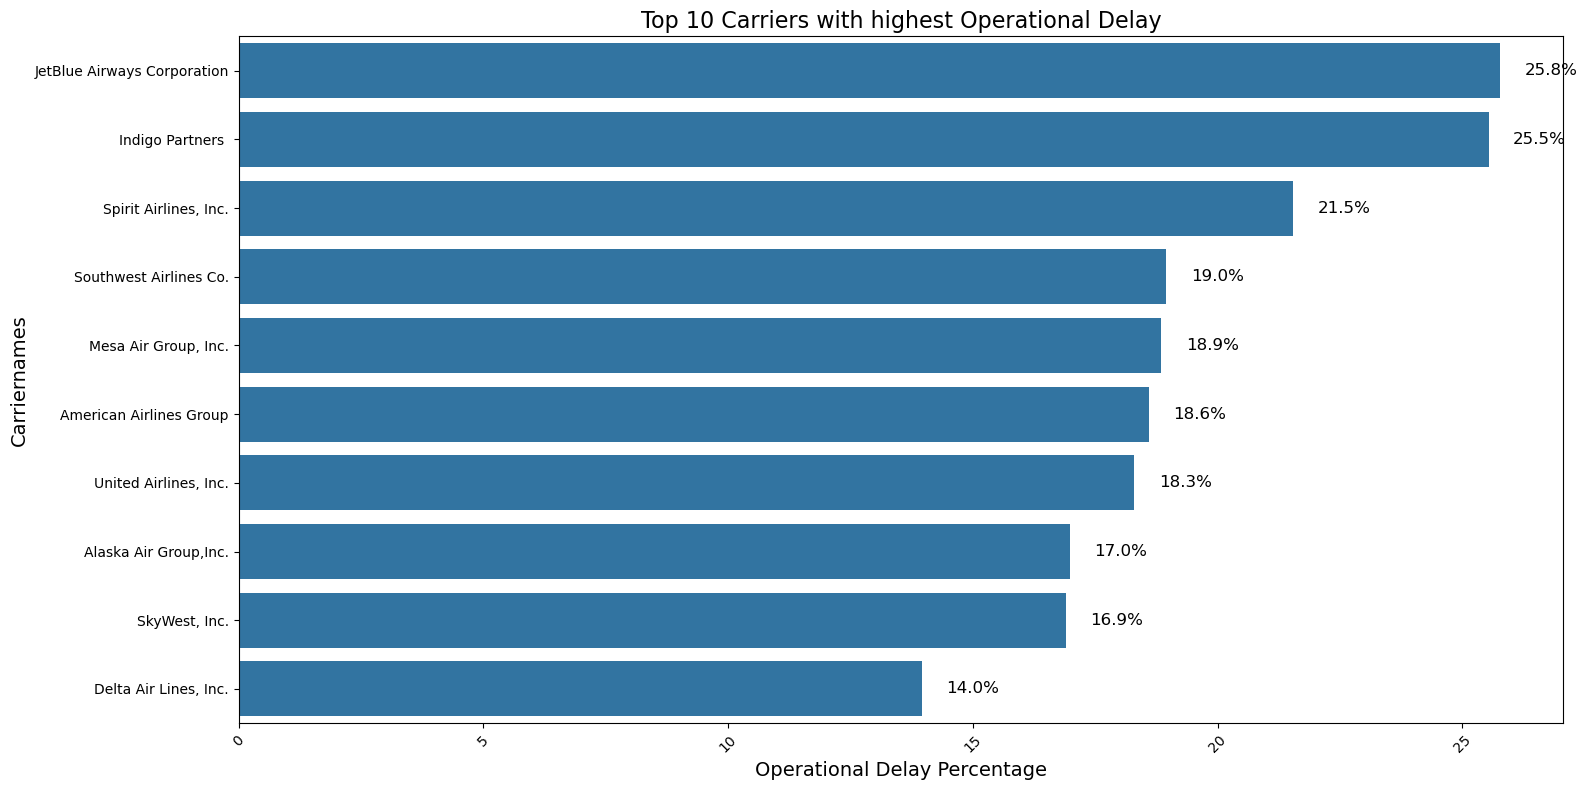

In [222]:
#Plot graph to show the Aircarries with highest  Operational Delay Percentage
# Set figure size
plt.figure(figsize=(16, 8))

# Create the bar plot for on-time arrival percentages
#sns.barplot(x='Parent Company', y='Ontime_arrival_percentage', data=grouped_carrier_data,hue ='Ontime_arrival_percentage',legend=False, palette='viridis')
sns.barplot(x='delayed_operations_percentage', y='Parent_Company', data=grouped_carrier_data_sorted)

for i in range(len(grouped_carrier_data)):
    plt.text(
        x=grouped_carrier_data_sorted['delayed_operations_percentage'].iloc[i] + 0.5,  # Position the label slightly to the right of the bar
        y=i,  # Position the label at the center of the bar
        s=f'{grouped_carrier_data_sorted["delayed_operations_percentage"].iloc[i]:.1f}%',  # Format the label as a percentage
        va='center', 
        ha='left', 
        color='black',  
        fontsize=12  
    )
# Adding titles and labels
plt.title('Top 10 Carriers with highest Operational Delay', fontsize=16)
plt.xlabel('Operational Delay Percentage', fontsize=14)
plt.ylabel('Carriernames', fontsize=14)
plt.xticks(rotation=45)
# Display the plot
plt.tight_layout()
plt.show()


##### Jetblue Airways Corporation has highest operational delays (25.78%) followed by Indigo Partners(25.5%) and Spirit Airlines Inc(21.5%)
##### These low-cost and ultra-low-cost carriers (LCCs and ULCCs) often experience higher operational delays.

Least Punctual Airlines / The Airline has highest Delays
Key Takeaways: 
1. Delta Air Lines has the lowest delay rate (15.42%), making it the most reliable airline among the top 10.
2. JetBlue Airways has the highest delay rate (28.42%), indicating that nearly 1 in 3 flights are delayed.
3. Indigo Partners and Spirit Airlines also have higher delay percentages (27.89% and 23.92%), suggesting they may not be the best choice if punctuality is a priority.
4. The gap between the most and least delayed airline is approximately 13%, showing noticeable differences in reliability among airlines.
5. Most airlines fall within a 15%–25% delay range, which means delays are relatively common even among the top-performing carriers.

 ## 3. Which airports experience the highest arrival delays and highest ontime operations?

In [225]:
top20_airports_service_counts = df_cleaned.groupby('airport')['arr_flights'].sum().sort_values(ascending=False).head(20).sum()
total_airports_service_counts = df_cleaned.groupby('airport')['arr_flights'].sum().sort_values(ascending=False).sum()
top20_airport_operation_percentage = top20_airports_service_counts/total_airports_service_counts *100
print(top20_airport_operation_percentage)


52.09947142043768


##### 20 Airports contribute to 50% of the overall airtraffic.So we are limiting the analysis to this 20 most busiest airports.

In [227]:
#Group by Airlines to calculate the delay percentage and ontime arrival percentage for each airport

grouped_airport_data=df_cleaned.groupby('airport')[['arr_flights','arr_cancelled','arr_diverted','arr_del15','carrier_ct','weather_ct','nas_ct','security_ct','late_aircraft_ct']].sum().sort_values(by ='arr_flights',ascending=False).head(20).reset_index()
grouped_airport_data
grouped_airport_data['Ontime_operations'] = grouped_airport_data['arr_flights'] - (
    grouped_airport_data['arr_cancelled'] + 
    grouped_airport_data['arr_diverted'] + 
    grouped_airport_data['arr_del15']
)

grouped_airport_data['Ontime_arrival_percentage'] = (grouped_airport_data['Ontime_operations'] / grouped_airport_data['arr_flights']) * 100
grouped_airport_data['delayed_operations_percentage'] = grouped_airport_data['arr_del15'] /grouped_airport_data['arr_flights']* 100
grouped_airport_data['carrier_delay_percentage'] = grouped_airport_data['carrier_ct'] /grouped_airport_data['arr_del15']* 100
grouped_airport_data['weather_delay_percentage'] = grouped_airport_data['weather_ct'] /grouped_airport_data['arr_del15']* 100
grouped_airport_data['nas_delay_percentage'] = grouped_airport_data['nas_ct'] /grouped_airport_data['arr_del15']* 100
grouped_airport_data['security_delay_percentage']= grouped_airport_data['security_ct'] /grouped_airport_data['arr_del15']* 100
grouped_airport_data['late_arrival_percentage']= grouped_airport_data['late_aircraft_ct'] /grouped_airport_data['arr_del15']* 100
grouped_airport_data

grouped_airport_data_sorted = grouped_airport_data[0:20].sort_values(by = "delayed_operations_percentage",ascending = False).reset_index()
grouped_airport_data_sorted
grouped_airport_data_sorted_1 = grouped_airport_data[0:20].sort_values(by = "Ontime_arrival_percentage",ascending = False).reset_index()


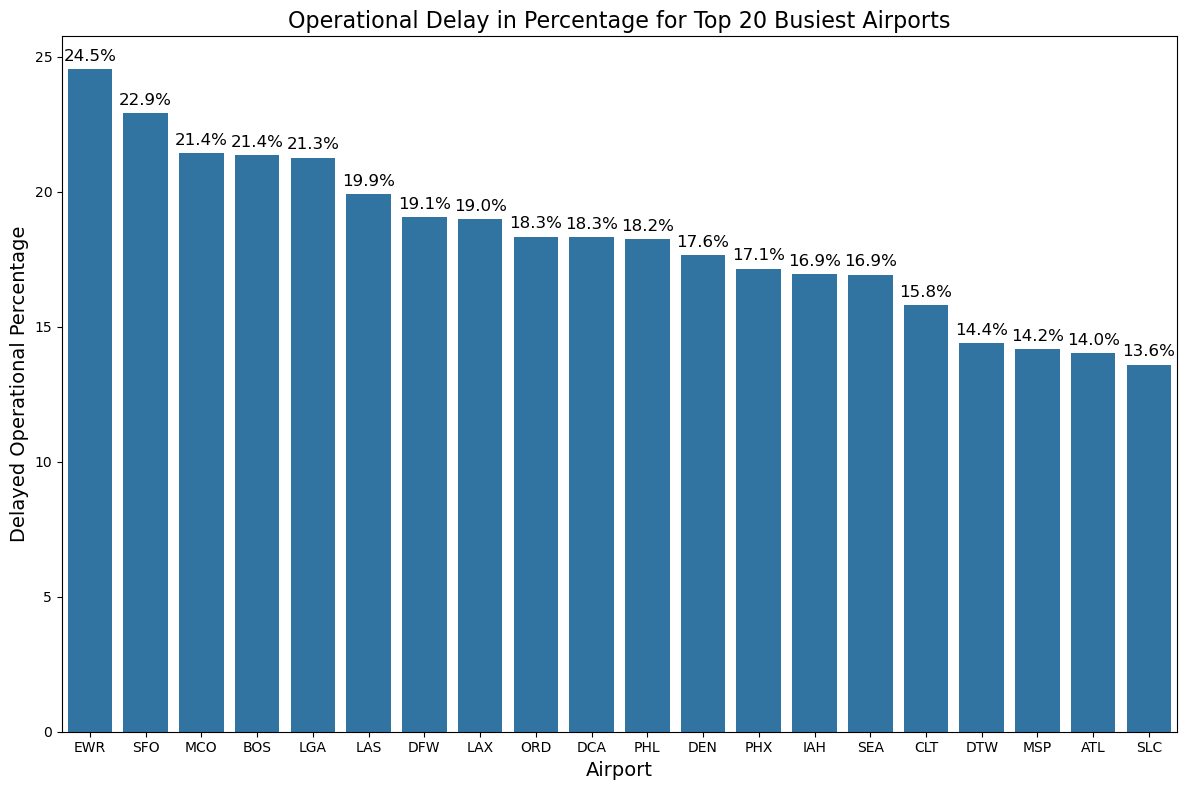

In [228]:
#Plot graph to show the airports with highest operational delays
# Set figure size
plt.figure(figsize=(12, 8))

# Create the bar plot for on-time arrival percentages
sns.barplot(x='airport', y='delayed_operations_percentage', data=grouped_airport_data_sorted)

# Add percentage annotations on top of each bar
for i, value in enumerate(grouped_airport_data_sorted['delayed_operations_percentage']):
    # Add text with the percentage on top of each bar
    plt.text(i, value + 0.2, f'{value:.1f}%', ha='center', va='bottom', fontsize=12, color='black')


# Adding titles and labels
plt.title('Operational Delay in Percentage for Top 20 Busiest Airports', fontsize=16)
plt.ylabel('Delayed Operational Percentage', fontsize=14)
plt.xlabel('Airport', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()


##### EWR(Newark, NJ ): Highest delay rate (24.5%), with nearly 1 in 4 flights delayed.
##### SFO and MCO: Higher delay rates (22.9% and 21.4%)
##### Delay Gap: ~10% difference between the most and least delayed airlines, highlighting reliability differences.
##### Delay Range: Most Airports experience delays between 13%–25%, indicating common delays even among top performers.


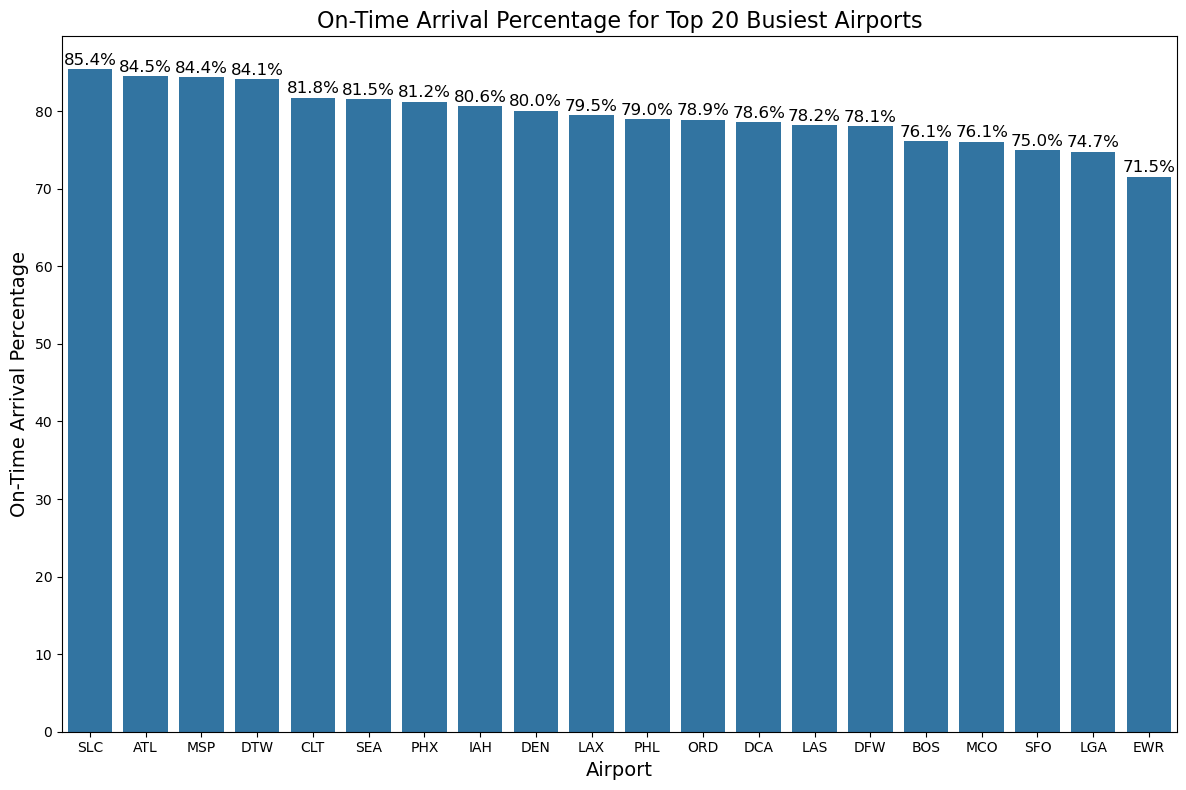

In [230]:
#Plot graph to show the airports with highest operational Efficiency percentage
# Set figure size
plt.figure(figsize=(12, 8))

# Create the bar plot for on-time arrival percentages
#sns.barplot(x='Ontime_arrival_percentage', y='airport', data=grouped_airport_data,hue ='airport',legend=False, palette='viridis')
sns.barplot(x='airport', y='Ontime_arrival_percentage', data=grouped_airport_data_sorted_1)

# Add percentage annotations on top of each bar
for i, value in enumerate(grouped_airport_data_sorted_1['Ontime_arrival_percentage']):
    # Add text with the percentage on top of each bar
    plt.text(i, value + 0.2, f'{value:.1f}%', ha='center', va='bottom', fontsize=12, color='black')

# Adding titles and labels
plt.title('On-Time Arrival Percentage for Top 20 Busiest Airports', fontsize=16)
plt.ylabel('On-Time Arrival Percentage', fontsize=14)
plt.xlabel('Airport', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()


##### SLC(Salt Lake City International): Highest operational efficiency percentage.
##### ATL(Atlanta Intl) , MSP(Minneapolis Intl),DTW(Detroit ): have on-time performance above 84%.
##### Delay Gap: ~14% difference between the most and least delayed airports, highlighting reliability differences.
##### Delay Range: Most airports experience delays between 15%–30%, indicating common delays even among top performers.

## 4.Which airports experience the most delays because of nas (National Aviation System Delays - ATC Congestion, Runway Delays)

In [233]:
#create a data frame to populate nas_delay_percentage for top 20 busiest airports
grouped_airport_data_nas = grouped_airport_data[0:20].sort_values(by = "nas_delay_percentage",ascending = False).reset_index()


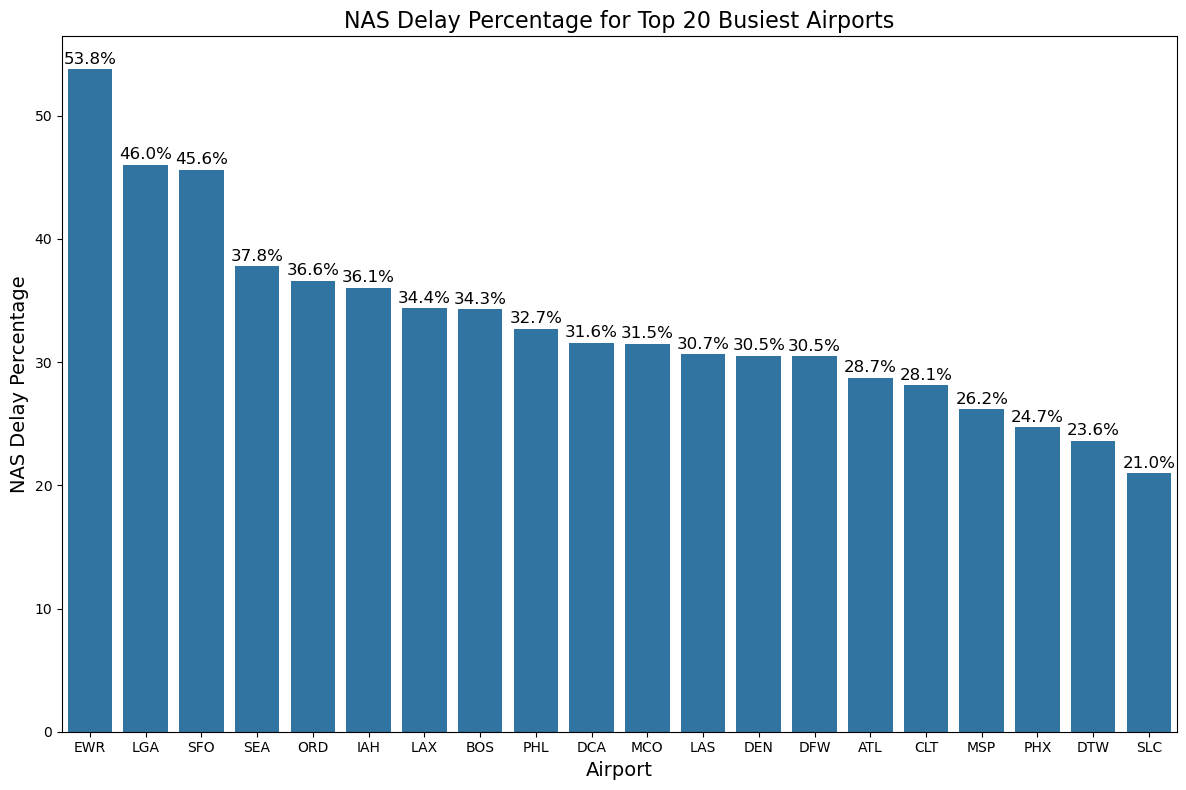

In [234]:
#Plot graph to show the airports airports experience the most delays because of nas
# Set figure size
plt.figure(figsize=(12, 8))

# Create the bar plot for on-time arrival percentages
sns.barplot(x='airport', y='nas_delay_percentage', data=grouped_airport_data_nas)

# Add percentage annotations on top of each bar
for i, value in enumerate(grouped_airport_data_nas['nas_delay_percentage']):
    # Add text with the percentage on top of each bar
    plt.text(i, value + 0.2, f'{value:.1f}%', ha='center', va='bottom', fontsize=12, color='black')

# Adding titles and labels
plt.title('NAS Delay Percentage for Top 20 Busiest Airports', fontsize=16)
plt.ylabel('NAS Delay Percentage', fontsize=14)
plt.xlabel('Airport', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

#### Among the top 20 busiest airports of US,EWR experience highest NAS delay percentage followed by  LGA and SFO.

As shown in Chart EWR (Newark Liberty International Airport, located in Newark, New Jersey, USA.) has 53.76 % Delay due to NAS (ational Aviation System Delays : ATC , Runway Delays): 3 Runways¶
The combination of high traffic volume, weather impacts, ATC congestion, regional airspace constraints, and airport-specific operational challenges likely contributes to EWR's high NAS delays. Since NAS delays are not solely under the control of the airport but are part of a broader system, the interdependencies between the airport and the airspace system can lead to significant delays, especially during peak travel times or bad weather conditions.

### B. What are the main causes of flight delays and how do they differ they differ depending on the airline, airport and season?
1. What are the main causes of flight delays?
2. How does Flight delays differ depending on the airline?
3. How does Flight delays differ depending on the airport?
4. How does Flight delays differ depending on the Season?

# 1. What are the main causes of flight delays?

In [238]:
#Calculate the sum of delayed minutes for different causes to identify impact of each cause
total_delay_minutes = df_cleaned["arr_delay"].sum()
carrier_delay_minutes = df_cleaned["carrier_delay"].sum()
weather_delay_minutes = df_cleaned["weather_delay"].sum()
nas_delay_minutes = df_cleaned["nas_delay"].sum()
security_delay_minutes = df_cleaned["security_delay"].sum()
late_aircraft_delay_minutes = df_cleaned["late_aircraft_delay"].sum()

carrier_delay_percentage = (carrier_delay_minutes/total_delay_minutes)*100
weather_delay_percentage = (weather_delay_minutes/total_delay_minutes)*100
nas_delay_percentage = (nas_delay_minutes/total_delay_minutes)*100
security_delay_percentage = (security_delay_minutes/total_delay_minutes)*100
late_aircraft_delay_percentage = (late_aircraft_delay_minutes/total_delay_minutes)*100

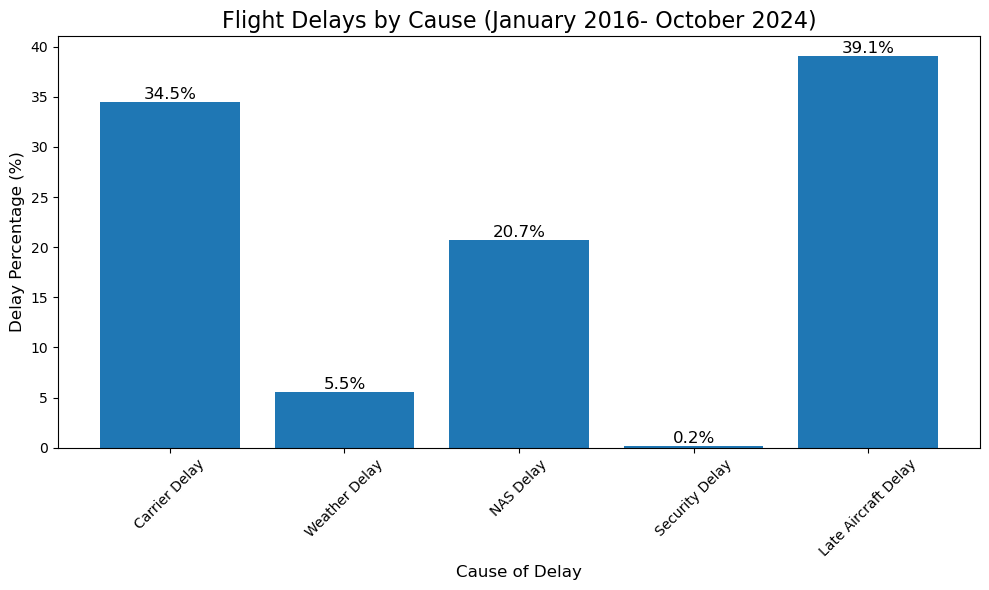

In [239]:
#Plot bar chart to show the percenatge of each delay cause
delay_causes = [
    'Carrier Delay', 
    'Weather Delay', 
    'NAS Delay', 
    'Security Delay', 
    'Late Aircraft Delay'
]

# Delay percentages for each cause
delay_percentages = [
    carrier_delay_percentage, 
    weather_delay_percentage, 
    nas_delay_percentage, 
    security_delay_percentage, 
    late_aircraft_delay_percentage
]

# Plotting the bar chart
plt.figure(figsize=(10, 6))

bars = plt.bar(delay_causes, delay_percentages)

for bar in bars:
    yval = bar.get_height()  # Get the height of the bar (percentage value)
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}%', ha='center', va='bottom', fontsize=12)


# Adding titles and labels
plt.title('Flight Delays by Cause (January 2016- October 2024)', fontsize=16)
plt.xlabel('Cause of Delay', fontsize=12)
plt.ylabel('Delay Percentage (%)', fontsize=12)

# Display the plot
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

1. Late aircraft delay: 39.08% 
This is the largest segment, indicating that more than one-third of flight delays are due to previous aircraft arriving late, causing a domino effect on subsequent flights.

2. Carrier delay: 34.46% 
These delays are caused by the airline itself, including issues like maintenance problems, crew availability, and operational delays.

3. NAS delay: 20.75% 
National Aviation System delays include air traffic control delays, heavy traffic volume, and other infrastructure-related issues.

4. Weather delay: 5.54% 
Delays caused by weather conditions such as storms, fog, and other weather-related disruptions.

5. Security delay: 0.18% 
The smallest segment, indicating that only a very small percentage of delays are due to security-related issues.



## How do various causes of delay  vary with time ?

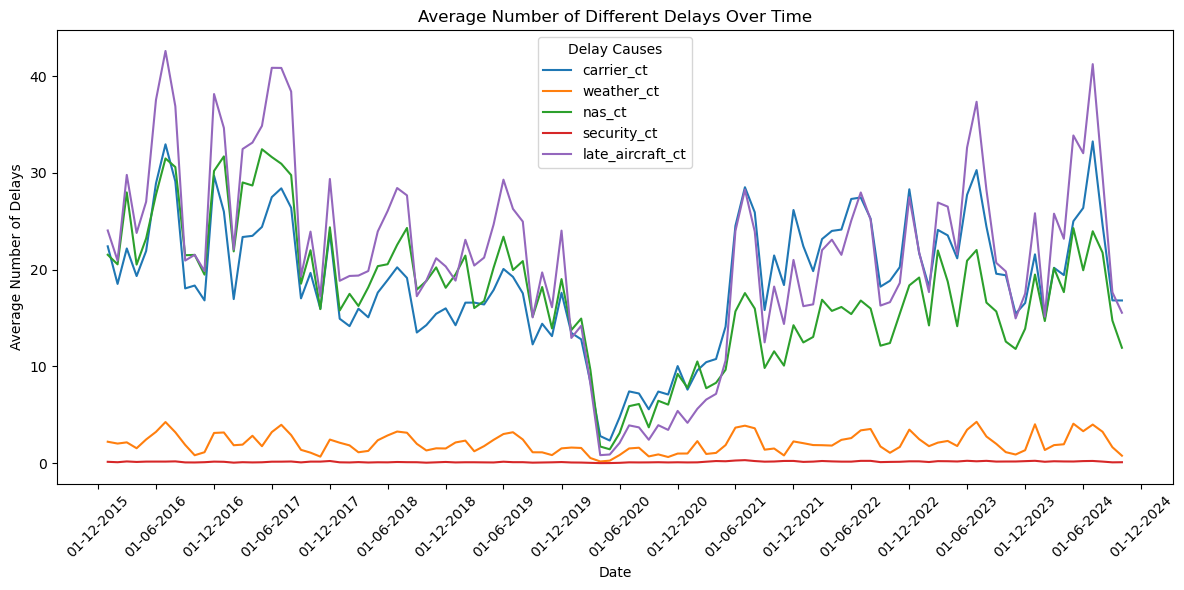

In [242]:
import matplotlib.pyplot as plt
import pandas as pd

#df_cleaned['date'] = pd.to_datetime(df_cleaned['date'], format='%d-%m-%Y')

# Group by date and calculate the average delay for each delay cause
average_delays = df_cleaned.groupby('date')[['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']].mean()

# Plot the line graph
plt.figure(figsize=(12, 6))

# Plotting each delay cause on the same plot
for column in average_delays.columns:
   plt.plot(average_delays.index, average_delays[column], label=column)

# Adding titles and labels
plt.title('Average Number of Different Delays Over Time')
plt.xlabel('Date')
plt.ylabel('Average Number of Delays')
plt.legend(title='Delay Causes')

# Set the x-axis ticks to be every 6 months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1, interval=6)) # 6-month gap
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y')) # Format for the date labels

# Rotate the date labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

##### Late aircraft ct has remained consistent top contributor for delays from 2016-2020.
We can see a dip in overall contributors from dec-2019 to june -2020 (covid period)

##### from 2020 JUNE -2022 December Carrier delay has surpassed late career delay and later late aircraft ct again became top contributor.
The peak in the count of carrier delays from June 2020 to December 2022 in U.S. traffic is largely linked to the impacts of the COVID-19 pandemic and the subsequent recovery period.
When airlines began resuming operations after the initial pandemic shutdown, they faced significant operational challenges. Reduced staffing, crew shortages, and reconfigured schedules led to inefficiencies that increased carrier delays.Maintainence schedules of flights were affected during panademic.Also there was a rise in demand of flights post lockdown.But the carriers were not sure about the stability of demand(multiple covid waves) .

#####  Reduction in NAS DELAYS in recent years is observed.
Recent reductions in NAS delays have been achieved through a combination of technological, operational, and collaborative improvements:
Improved coordination, real-time data integration, and updated procedures have enabled air traffic controllers to manage high traffic volumes more flexibly and responsively.Advances in weather prediction have allowed for proactive adjustments to flight paths, minimizing the impact of adverse conditions.



# 2. How does Flight delays differ depending on the airline?

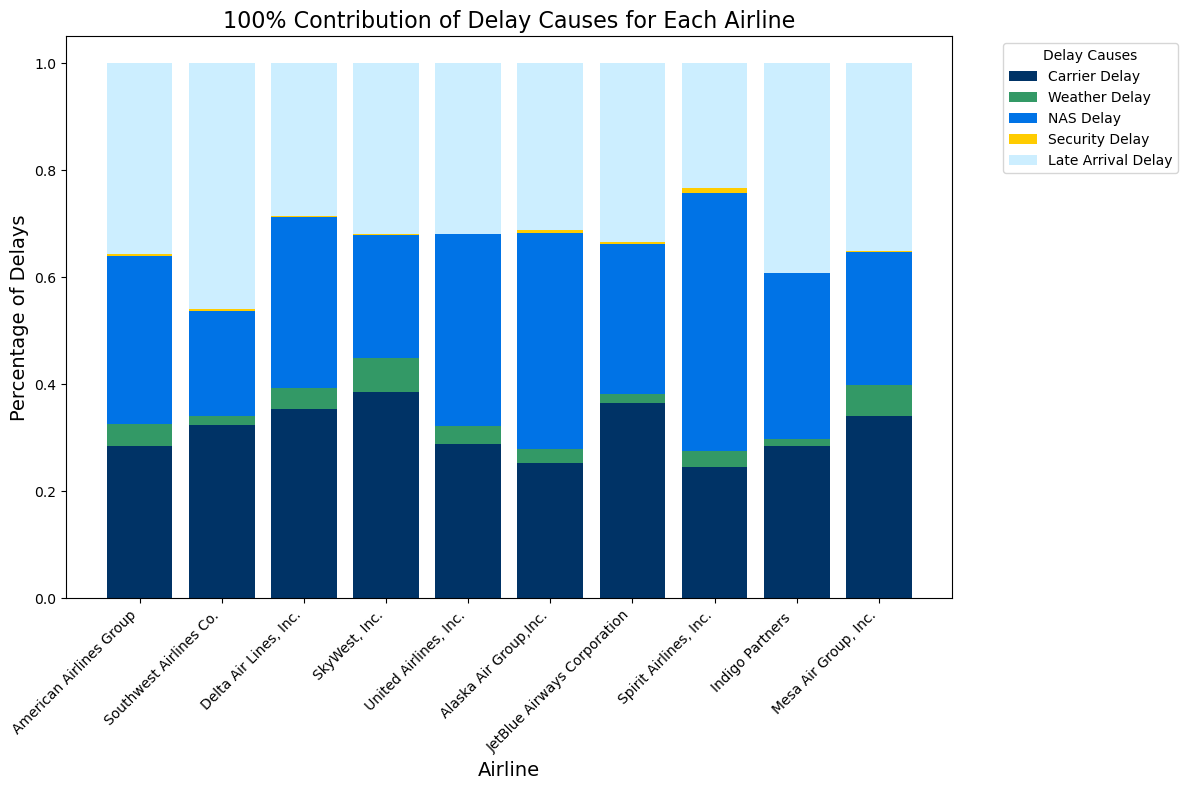

In [245]:
# 100% Stacked Bar Plot
plt.figure(figsize=(12, 8))

# Normalize the delay data to 100% stacked bars
delay_data_percentage = grouped_carrier_data[['carrier_delay_percentage', 'weather_delay_percentage', 
                                   'nas_delay_percentage', 'security_delay_percentage', 'late_arrival_percentage']].div(
                                   grouped_carrier_data[['carrier_delay_percentage', 'weather_delay_percentage', 
                                             'nas_delay_percentage', 'security_delay_percentage', 'late_arrival_percentage']].sum(axis=1), axis=0)

# Plot the 100% stacked bar chart
plt.bar(grouped_carrier_data['Parent_Company'], delay_data_percentage['carrier_delay_percentage'], label='Carrier Delay', color='#003366')
plt.bar(grouped_carrier_data['Parent_Company'], delay_data_percentage['weather_delay_percentage'], label='Weather Delay', color='#339966', bottom=delay_data_percentage['carrier_delay_percentage'])
plt.bar(grouped_carrier_data['Parent_Company'], delay_data_percentage['nas_delay_percentage'], label='NAS Delay', color='#0073e6', bottom=delay_data_percentage['carrier_delay_percentage'] + delay_data_percentage['weather_delay_percentage'])
plt.bar(grouped_carrier_data['Parent_Company'], delay_data_percentage['security_delay_percentage'], label='Security Delay', color='#ffcc00', bottom=delay_data_percentage['carrier_delay_percentage'] + delay_data_percentage['weather_delay_percentage'] + delay_data_percentage['nas_delay_percentage'])
plt.bar(grouped_carrier_data['Parent_Company'], delay_data_percentage['late_arrival_percentage'], label='Late Arrival Delay', color='#cceeff', bottom=delay_data_percentage['carrier_delay_percentage'] + delay_data_percentage['weather_delay_percentage'] + delay_data_percentage['nas_delay_percentage'] + delay_data_percentage['security_delay_percentage'])

# Add titles and labels
plt.title('100% Contribution of Delay Causes for Each Airline', fontsize=16)
plt.xlabel('Airline', fontsize=14)
plt.ylabel('Percentage of Delays', fontsize=14)
plt.xticks(rotation=45, ha="right")

# Add a legend
plt.legend(title='Delay Causes', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


##### Late Aircraft Delay:
late_aircfaft delays are Higher at Southwest Airlines and Indigo Partners.
-Suggestions for these airlines: 
 1. Improved Scheduling: Implement more robust scheduling systems that account for potential delays and buffer times.
 2. Efficient Turnaround: Optimize turnaround processes for quicker aircraft servicing.(Quick and Better Service)
 3. Predictive Maintenance: Use predictive maintenance to anticipate and address potential technical issues before they cause delays.

##### Carrier Delay:
Carrier delays are Higher at Skywest Inc and JetBlue Airways corporation:
Suggestions for these airlines: 
1. Resource Allocation: Ensure that airport resources such as ground handling staff and equipment are efficiently allocated to support airline operation.
2. Real-time Monitoring: Use real-time monitoring tools to track and address operational issues promptly.

##### NAS Delays:
Nas Delays are Higher at Spirit Airlines and Alaska Airlines
Suggestions for these airlines: 
1. Coordination with ATC: Improve communication and coordination with air traffic control to manage traffic flow more efficiently.
2. Infrastructure Investment: Invest in airport infrastructure to accommodate higher traffic volumes and reduce congestion.
3. Advanced Traffic Management: Implement advanced traffic management systems to optimize aircraft movements.

##### Weather Delay
Mesa and Skywest Airlines faces most weather Related delays:
Suggestions for these airlines: 
1. Advanced Forecasting: Invest in accurate and timely weather forecasting tools to anticipate and plan for weather-related disruptions.
2. Flexible Scheduling: Allow for more flexible flight schedules during seasons with severe weather to minimize disruptions.
3. Diversion Plans: Develop robust diversion plans to manage flights impacted by weather conditions effectively.

##### Security Delay:
Spirit Airlines faces Security delays:
Suggestions for these airlines: 
1. Efficient Screening: Implement more efficient and effective security screening procedures to minimize delays.
2. Proactive Security Measures: Regularly update and test security protocols to stay ahead of potential threats.
3. Communication: Keep passengers informed about security procedures and any potential delays to manage expectations.

American Airlines, Delta Airlines and united Airlines : late_aircraft, nas and carrier these three types of Delays are moderatly responsible for delays at American Airlines, Delta Airlines and united Airlines. these Airlines need to look into all these Delays and Suggestions for Improvemets. 


# How does Flight delays differ depending on the States?

In [248]:
#data frame to hold flight delay details grouped by US states  
state_flight_detail = df_cleaned.groupby('Airport_State')[['arr_flights','arr_del15','carrier_ct','weather_ct','nas_ct','security_ct','late_aircraft_ct']].sum().sort_values(by='arr_flights', ascending=False).head(15).reset_index()
state_flight_detail['delayed_operations_percentage'] = state_flight_detail['arr_del15'] /state_flight_detail['arr_flights']* 100
state_flight_detail['carrier_delay_percentage'] = state_flight_detail['carrier_ct'] /state_flight_detail['arr_del15']* 100
state_flight_detail['weather_delay_percentage'] = state_flight_detail['weather_ct'] /state_flight_detail['arr_del15']* 100
state_flight_detail['nas_delay_percentage'] = state_flight_detail['nas_ct'] /state_flight_detail['arr_del15']* 100
state_flight_detail['security_delay_percentage']= state_flight_detail['security_ct'] /state_flight_detail['arr_del15']* 100
state_flight_detail['late_arrival_percentage']= state_flight_detail['late_aircraft_ct'] /state_flight_detail['arr_del15']* 100
state_flight_detail_sort = state_flight_detail[0:15].sort_values(by = "delayed_operations_percentage",ascending = False).reset_index()

In [249]:
import folium
import pandas as pd

# Your state data with latitude and longitude for each state
state_data = {
    'State': ['New Jersey', 'New York', 'Florida', 'Nevada', 'California', 'Texas', 
              'Pennsylvania', 'Illinois', 'Colorado', 'Arizona', 'Washington', 
              'North Carolina', 'Michigan', 'Georgia', 'Minnesota'],
    'Delayed Operations Percentage': [24.418428, 20.835265, 20.682738, 19.687200, 19.012963, 18.543553, 
                                     18.115735, 18.036851, 17.933753, 17.396410, 16.795014, 
                                     16.676507, 15.217684, 14.264918, 14.213391],
    'Latitude': [40.0583, 40.7128, 27.9944, 38.8026, 36.7783, 31.9686, 41.2033, 40.6331, 39.5501, 
                 34.0489, 47.7511, 35.7596, 44.3148, 33.7490, 46.7296],  # Example latitudes for each state
    'Longitude': [-74.4057, -74.0060, -81.7603, -116.4194, -119.4179, -99.9018, -77.1945, -89.3985, -105.7821, 
                  -111.0937, -120.7401, -77.0369, -85.6024, -84.3880, -94.6859]  # Example longitudes for each state
}

# Create a DataFrame
df = pd.DataFrame(state_data)

# Create a folium map centered around the US
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Function to determine circle size based on delay percentage (adjust scale factor as needed)
def get_radius(percentage):
    return percentage * 1  # Adjust 0.2 to control circle size scaling

# Add markers for each state with circle size based on the delayed operations percentage
for _, row in df.iterrows():
    folium.CircleMarker(
        location=(row['Latitude'], row['Longitude']),
        radius=get_radius(row['Delayed Operations Percentage']),  # Circle size based on percentage
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        popup=f"{row['State']}: {row['Delayed Operations Percentage']:.2f}%",
    ).add_to(m)

# Save the map to an HTML file
m.save("state_delays_map_circle_size.html")

# To display in a Jupyter notebook (if needed)
m


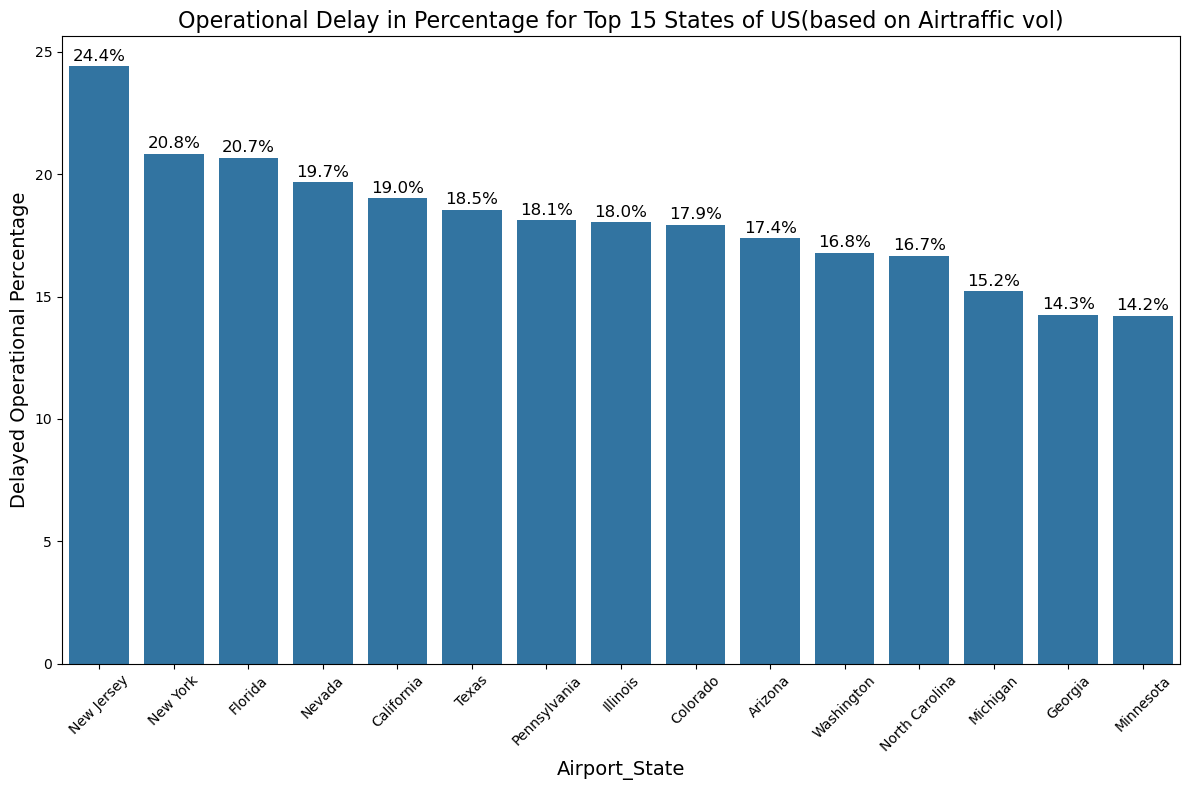

In [250]:
#Plot graph to show the STATES with highest operational delays
# Set figure size
plt.figure(figsize=(12, 8))

# Create the bar plot for on-time arrival percentages
sns.barplot(x='Airport_State', y='delayed_operations_percentage', data=state_flight_detail_sort)

# Add percentage annotations on top of each bar
for i, value in enumerate(state_flight_detail_sort['delayed_operations_percentage']):
    # Add text with the percentage on top of each bar
    plt.text(i, value + 0.1, f'{value:.1f}%', ha='center', va='bottom', fontsize=12, color='black')

# Adding titles and labels
plt.title('Operational Delay in Percentage for Top 15 States of US(based on Airtraffic vol)', fontsize=16)
plt.ylabel('Delayed Operational Percentage', fontsize=14)
plt.xlabel('Airport_State', fontsize=14)
plt.xticks(rotation=45)
# Display the plot
plt.tight_layout()
plt.show()

New Jersey experience highest operational delay% followed by Newyork and Florida
Heavy Traffic Volume: The region serves as a hub for numerous flights, with many airlines operating in and out of nearby airports. 
Congested Airspace: New Jersey's airspace is closely integrated with the New York metropolitan area, leading to complex air traffic management and potential bottlenecks. New Jersey's delays are often concentrated around Newark Liberty International Airport, which is in a highly congested airspace shared with the New York metropolitan area.Air Traffic can be congested since there are only 3 airports in this state. The East Coast often experience variable weather which can cause delays.

# 3. How does Flight delays differ depending on the Airport?

In [253]:
#Dataframe to capture flight delay percentage grouped by top 10 airports
delay_by_airports = df_cleaned.groupby("airport")[["arr_flights","arr_del15","carrier_ct","weather_ct","nas_ct","security_ct","late_aircraft_ct"]].sum().sort_values(by = "arr_flights",ascending = False)[:20].reset_index()

delay_by_airports["delay_percentage"] = delay_by_airports["arr_del15"] / delay_by_airports["arr_flights"] * 100
delay_by_airports["carrier_delay_percentage"] = delay_by_airports["carrier_ct"] / delay_by_airports["arr_del15"] * 100
delay_by_airports["weather_delay_percentage"] = delay_by_airports["weather_ct"] / delay_by_airports["arr_del15"] * 100
delay_by_airports["nas_delay_percentage"] = delay_by_airports["nas_ct"] / delay_by_airports["arr_del15"] * 100
delay_by_airports["security_delay_percentage"] = delay_by_airports["security_ct"] / delay_by_airports["arr_del15"] * 100
delay_by_airports["late_aircraft_delay_percentage"] = delay_by_airports["late_aircraft_ct"] / delay_by_airports["arr_del15"] * 100
delay_by_airports

,airport,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,delay_percentage,carrier_delay_percentage,weather_delay_percentage,nas_delay_percentage,security_delay_percentage,late_aircraft_delay_percentage
0,ATL,3044469.0,427055.0,130653.32,15937.35,122712.92,891.34,156860.31,14.027241,30.594027,3.731920,28.734688,0.208718,36.730704
1,ORD,2670477.0,489457.0,125942.39,17359.81,179163.00,747.84,166243.96,18.328448,25.731043,3.546749,36.604441,0.152790,33.964978
2,DEN,2316093.0,408689.0,126490.32,13434.00,124694.19,702.24,143368.30,17.645621,30.950263,3.287096,30.510777,0.171827,35.080049
3,DFW,2299987.0,438463.0,117613.31,21920.07,133739.36,1322.06,163868.11,19.063716,26.823999,4.999298,30.501858,0.301521,37.373304
4,CLT,1789738.0,282754.0,75971.44,11496.92,79496.38,786.73,115002.43,15.798625,26.868387,4.066050,28.115033,0.278238,40.672256
5,LAX,1785106.0,339022.0,107061.35,10325.62,116560.97,1079.32,103995.00,18.991701,31.579470,3.045708,34.381536,0.318363,30.675000
6,SEA,1462204.0,247553.0,67638.25,8188.39,93524.90,789.58,77410.74,16.930127,27.322735,3.307732,37.779748,0.318954,31.270370
7,PHX,1458948.0,250104.0,81667.11,5915.80,61861.62,768.20,99891.38,17.142763,32.653260,2.365336,24.734359,0.307152,39.939937
8,LAS,1417110.0,282012.0,78837.74,6534.40,86468.86,934.57,109236.37,19.900502,27.955456,2.317065,30.661412,0.331394,38.734653
9,IAH,1327103.0,224851.0,63912.50,9579.83,81067.60,330.41,69960.77,16.942995,28.424379,4.260524,36.053920,0.146946,31.114280


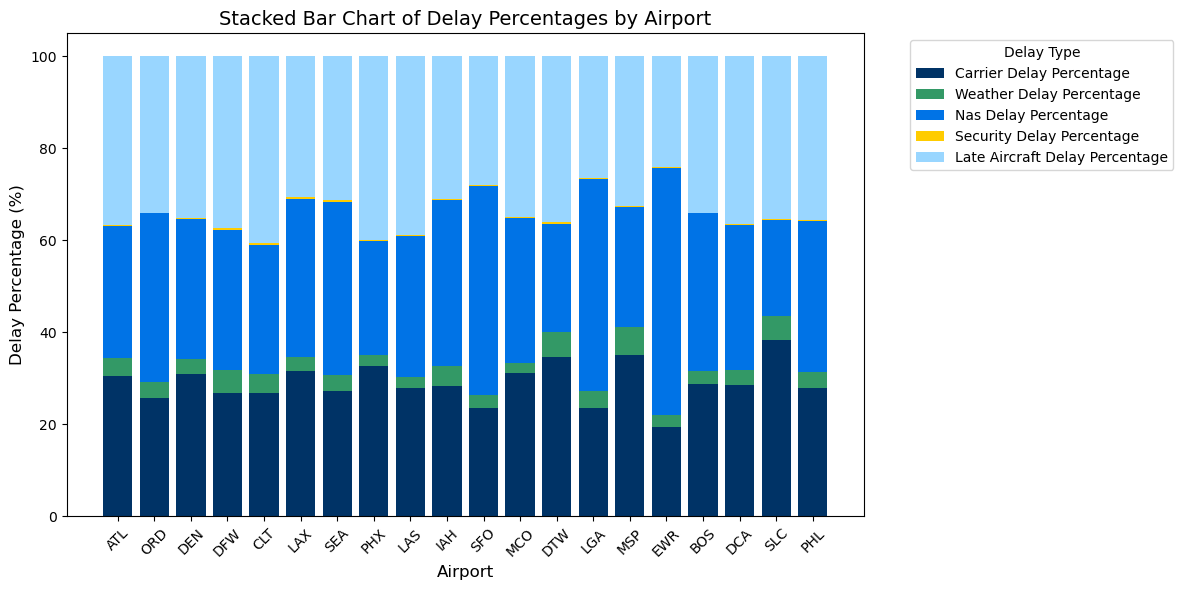

In [254]:
#Stacked bar chart to show contribution of each dealy cause for top 10 busiest airports
# Define categories and colors
# Define categories and colors
categories = [
    "carrier_delay_percentage", 
    "weather_delay_percentage", 
    "nas_delay_percentage", 
    "security_delay_percentage", 
    "late_aircraft_delay_percentage"
]


colors = ['#003366',  # Slightly Lighter Navy Blue  
          '#339966',  # Teal Green (Contrasts well with blues)  
          '#0073e6',  # Vivid Blue  
          '#ffcc00',  # Golden Yellow (Strong contrast with blue)  
          '#99d6ff',  # Light Blue  
          '#cceeff']  # Pale Blue  


fig, ax = plt.subplots(figsize=(12, 6))

# Set bottom positions for stacking
bottom = np.zeros(len(delay_by_airports["airport"]))

# Plot each delay type as a stacked bar
for i, category in enumerate(categories):
    ax.bar(delay_by_airports["airport"], delay_by_airports[category], label=category.replace("_", " ").title(), color=colors[i], bottom=bottom)
    bottom += delay_by_airports[category].values  # Update bottom position for next stack

# Labels and title
ax.set_xlabel("Airport", fontsize=12)
ax.set_ylabel("Delay Percentage (%)", fontsize=12)
ax.set_title("Stacked Bar Chart of Delay Percentages by Airport", fontsize=14)
ax.legend(title="Delay Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels correctly without extra output
ax.set_xticks(range(len(delay_by_airports["airport"])))  # Set the tick positions
ax.set_xticklabels(delay_by_airports["airport"], rotation=45)  # Rotate labels without printing output

# Show plot
plt.tight_layout()
plt.show()


##### Late Aircraft Delays:
Are Higher at following Airports
CLT (41%) – Charlotte Douglas International Airport (Domestic + International)
PHX (40%) – Phoenix Sky Harbor International Airport (Domestic + International)
LAS (39%) – McCarran International Airport (Domestic + International)


##### Carrier Delays:
are higher at following Airports
SLC (39%) – Salt Lake City International Airport,Salt Lake City (Domestic + International)
MSP (35%) – Minneapolis-Saint Paul International Airport (Domestic + International)
DTW (35%) – Detroit Metropolitan Wayne County Airport (Domestic + International)

##### NAS Delays:
Nas delas are Higher at following Airports: 
EWR (53%) – Newark Liberty International Airport,Newark, New Jersey, USA (Domestic + International)
LGA (46%) – LaGuardia Airpor,Queens, New York City, New York, USA (Primarily Domestic, Very few International flights)
SFO (45%) – San Francisco International Airport ,San Francisco, California, USA (Domestic + International)


##### Weather delays :
Weather Delays are higher at following Airports:
DTW: Detroit Metropolitan Wayne County Airport
MSP: Minneapolis–Saint Paul International Airport

##### Security Delay:(Very few , But at Some Airports need few Improvements )


# 4. How does Flight delays differ depending on the Seasons,Years,Months?

## Flight Delay Depending on Season(Winter, Summer...)

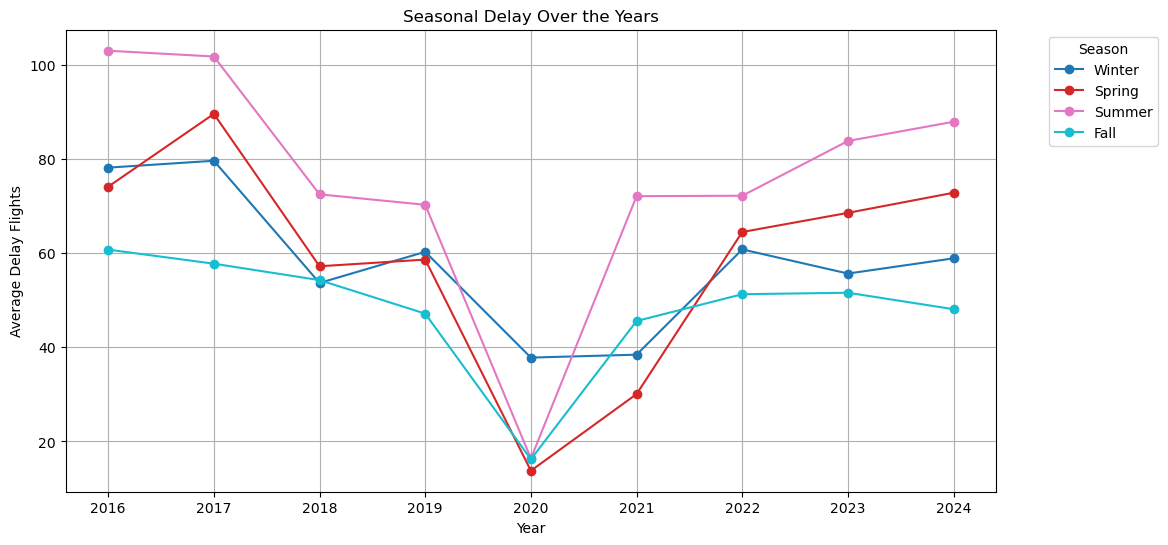

In [258]:
#Plot line graph to show seasonal trend of delays
# Define month-to-season mapping
season_map = {
    12: "Winter", 1: "Winter", 2: "Winter",
    3: "Spring", 4: "Spring", 5: "Spring",
    6: "Summer", 7: "Summer", 8: "Summer",
    9: "Fall", 10: "Fall", 11: "Fall"
}

# Map each month to its season
df_cleaned["season"] = df_cleaned["month"].map(season_map)

# Group by year and season, then calculate the mean cancellations
df_seasonal = df_cleaned.groupby(["year", "season"])["arr_del15"].mean().unstack()

# Ensure seasons appear in order (Winter → Spring → Summer → Fall)
df_seasonal = df_seasonal[["Winter", "Spring", "Summer", "Fall"]]

# Plot with a different color palette
df_seasonal.plot(figsize=(12,6), colormap="tab10", marker="o")

# Customizing the plot
plt.title("Seasonal Delay Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Delay Flights")
plt.legend(title="Season", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)

# Show plot
plt.show()

##### Identifying Trends:
1. The Summer season shows consistently high delays, peaking around 2019 and then dropping significantly in 2020 before rising again.
2. All seasons show a significant drop in average delays in the year 2020, likely due to an external factor affecting all flights (possibly the COVID-19 pandemic).
3. Post-2020, delays start increasing again for all seasons, indicating a recovery phase.

##### Comparing Seasons:
1. Summer generally has the highest average delays compared to other seasons.
2. Winter and Spring have relatively lower delays, with Fall showing moderate delays.

##### Yearly Analysis:
1. Compare the average delays for different seasons in the same year to understand which season experiences more delays.
2. Notice the variation in delays from year to year for each season, reflecting changes in operational or external factors.

##### Suggestions:
Staff Scheduling: Ensure adequate staffing levels to handle the high volume of summer travelers.

### C. Which airlines and airports experience the most cancellations and diversions and what are the underlying reasons?
1. Which airlines experience the most cancellations and diversions?
2. Which airports experience the most cancellations and diversions?
3. What are the seasonal trends in flight cancellations and diversions?

# 1▪ Which airlines and airports experience the most cancellations and diversions ?

###  The airlines experience the most cancellations

In [263]:
#Dataframe to capture cancellation percentage grouped by parentcompany details
Cancelation_Percentage_by_flight = df_cleaned.groupby("Parent_Company")[["arr_flights","arr_cancelled"]].sum().reset_index()

Cancelation_Percentage_by_flight["Cancelled_Percentage"] = (Cancelation_Percentage_by_flight["arr_cancelled"] / 
                                                             Cancelation_Percentage_by_flight["arr_flights"]) * 100 
Cancelation_Percentage_by_flight_sorted1 = Cancelation_Percentage_by_flight.sort_values(by="arr_cancelled", ascending=False)[:8]
Cancelation_Percentage_by_flight_sorted2 = Cancelation_Percentage_by_flight.sort_values(by="Cancelled_Percentage", ascending=False)[:8]


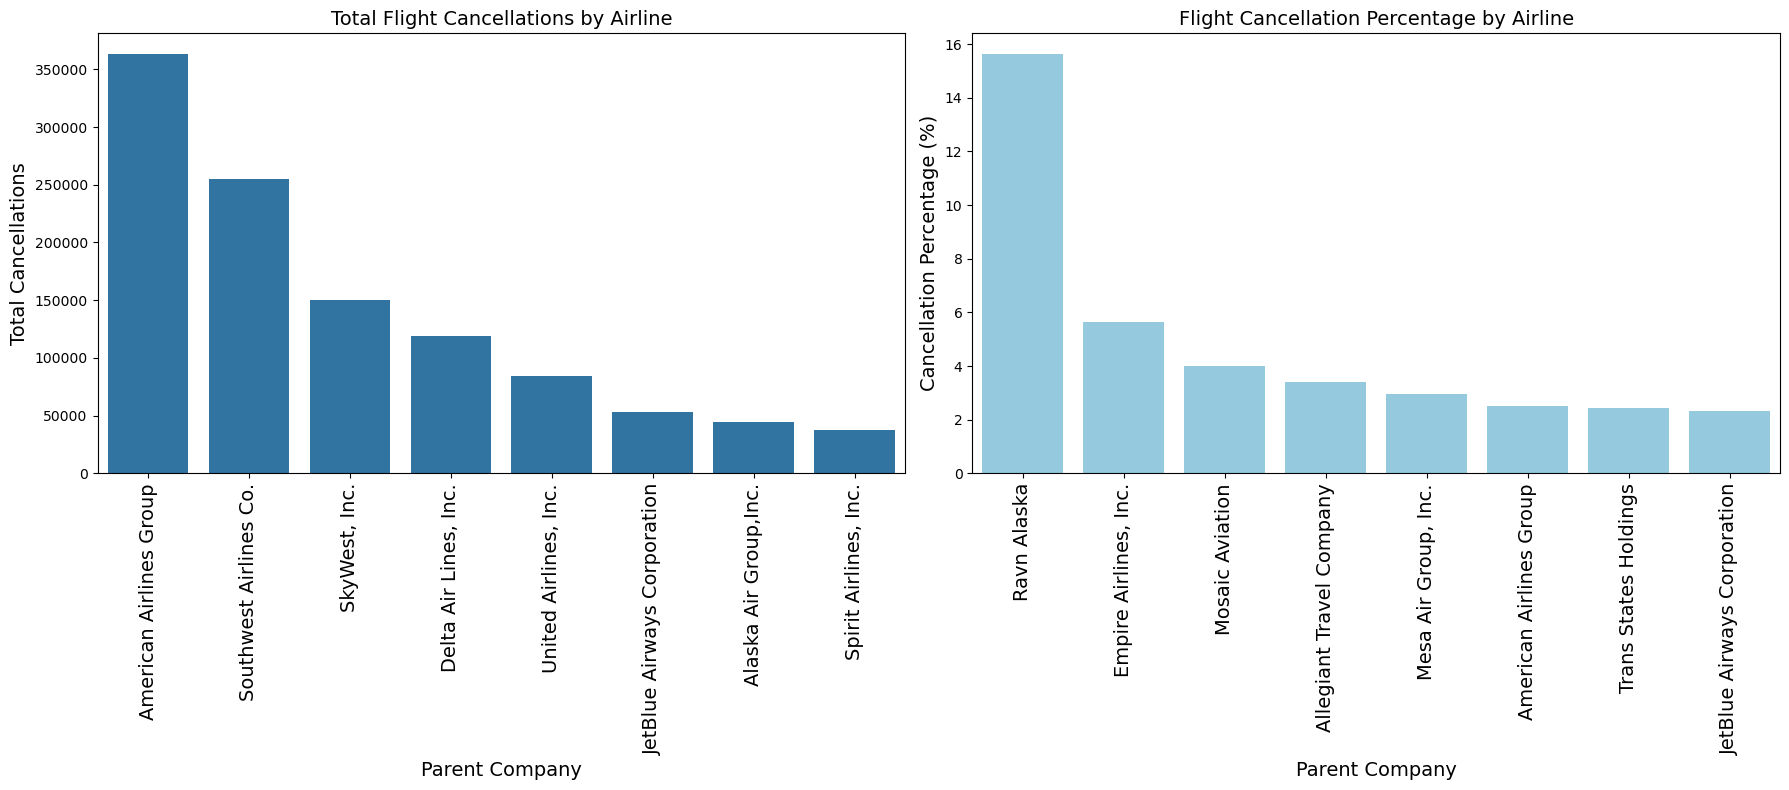

In [264]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot 1: Total Cancellations (Sorted)
sns.barplot(data=Cancelation_Percentage_by_flight_sorted1, x="Parent_Company", y="arr_cancelled", ax=axes[0])
axes[0].set_title("Total Flight Cancellations by Airline", fontsize=14)  # Corrected
axes[0].set_xlabel("Parent Company", fontsize=14)  # Corrected
axes[0].set_ylabel("Total Cancellations", fontsize=14)  # Corrected
axes[0].tick_params(axis="x", rotation=90, labelsize=14)  # Increase font size

# Plot 2: Cancellation Percentage (Sorted)
sns.barplot(data=Cancelation_Percentage_by_flight_sorted2, x="Parent_Company", y="Cancelled_Percentage", ax=axes[1], color="skyblue")
axes[1].set_title("Flight Cancellation Percentage by Airline", fontsize=14)  # Corrected
axes[1].set_xlabel("Parent Company", fontsize=14)  # Corrected
axes[1].set_ylabel("Cancellation Percentage (%)", fontsize=14)  # Corrected
axes[1].tick_params(axis="x", rotation=90, labelsize=14)  # Increase font size

plt.tight_layout()
plt.show()




##### COUNT GRAPH (On Left): 
1. Good if focusing on total impact on passengers.
2. Shows Airlines with the highest cancellations.
3. Highlights airlines that cause the most disruptions in total.
4. Larger airlines will naturally have more cancellations, so this can be biased.

##### Interpretation:
Total Cancellations: American Airlines Group has the highest total number of cancellations, suggesting it experiences significant operational challenges or high traffic volume.


##### Percentage Graph (On Right):
1. Best for fair comparisons (since larger airlines operate more flights).
2. Highlights which airlines are less reliable, regardless of size.
3. Better if comparing airline performance (reliability).

##### Cancellation Percentage: Ravn Alaska has the highest percentage of cancellations, indicating a higher likelihood of flight disruptions relative to the number of flights operated.

##### Ravn Alaska (High Cancellation Percentage):
1. Operational Review: Conduct a thorough review of operational processes to identify and address root causes of cancellations.
2. Infrastructure Investment: Invest in infrastructure and technology to reduce the likelihood of disruptions.

### The Airline that experiences most Diversions

In [267]:
# Group by Parent Company and calculate total flights & diversions
Diversion_Percentage_by_flight = df_cleaned.groupby("Parent_Company")[["arr_flights", "arr_diverted"]].sum().reset_index()

# Calculate diversion percentage
Diversion_Percentage_by_flight["Diversion_Percentage"] = (Diversion_Percentage_by_flight["arr_diverted"] / 
                                                           Diversion_Percentage_by_flight["arr_flights"]) * 100 
# Sort by total diversions for the first plot
Diversion_Percentage_by_flight_sorted1 = Diversion_Percentage_by_flight.sort_values(by="arr_diverted", ascending=False)[:8]
# Sort by diversion percentage for the second plot
Diversion_Percentage_by_flight_sorted2 = Diversion_Percentage_by_flight.sort_values(by="Diversion_Percentage", ascending=False)[:8]


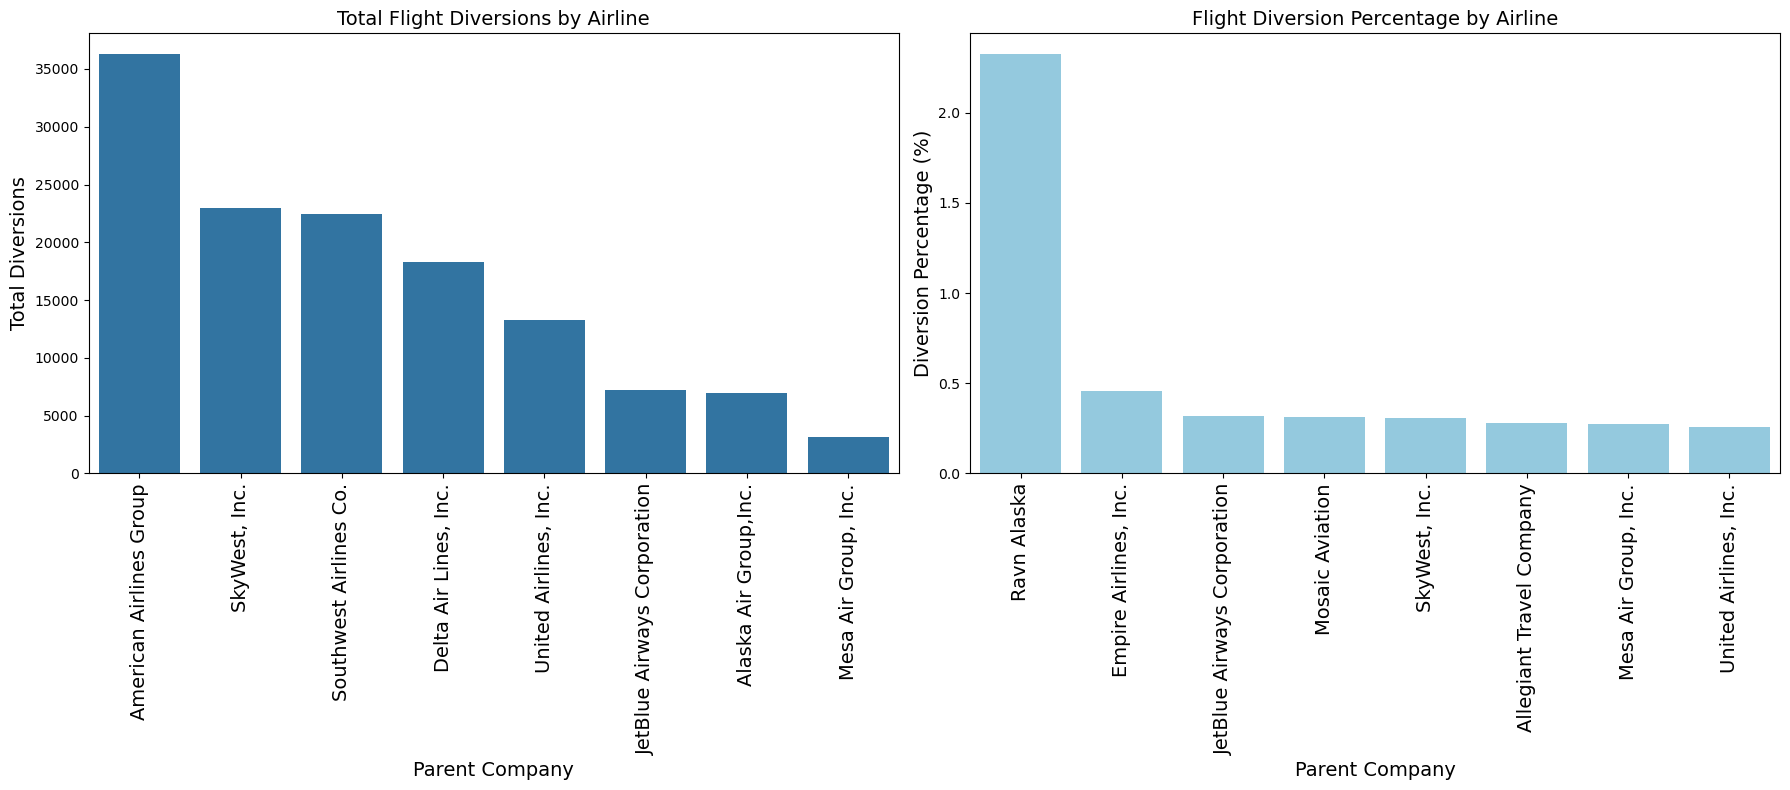

In [268]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18,8))

# Plot 1: Total Diversions (Sorted)
sns.barplot(data=Diversion_Percentage_by_flight_sorted1, x="Parent_Company", y="arr_diverted", ax=axes[0])
axes[0].set_title("Total Flight Diversions by Airline",fontsize = 14)
axes[0].set_xlabel("Parent Company",fontsize = 14)
axes[0].set_ylabel("Total Diversions",fontsize = 14)
axes[0].tick_params(axis="x", rotation=90,labelsize=14)

# Plot 2: Diversion Percentage (Sorted)
sns.barplot(data=Diversion_Percentage_by_flight_sorted2, x="Parent_Company", y="Diversion_Percentage", ax=axes[1], color="skyblue")
axes[1].set_title("Flight Diversion Percentage by Airline",fontsize = 14)
axes[1].set_xlabel("Parent Company",fontsize = 14)
axes[1].set_ylabel("Diversion Percentage (%)",fontsize = 14)
axes[1].tick_params(axis="x", rotation=90,labelsize=14)

plt.tight_layout()
plt.show()

##### Count_Diversion
Key Insight:
1. American Airlines Group has the highest number of total flight diversions,
2. followed by SkyWest, Inc., and Southwest Airlines Co.
3. This indicates that these airlines experience the most total diversions.

##### Diversion Percentage:
Key Insight: 
1. Ravn Alaska has the highest diversion percentage,
2. followed by Empire Airlines, Inc., and JetBlue Airways Corporation.
3. This suggests that a higher proportion of flights are diverted for these airlines, even if their total number of diversions might be lower than larger carriers.

# 2. Which Airport experiences most Cancellations and Diversions

### Which airports experience the highest number of Cancellations?

In [272]:
#Dataframe to capture cancellation percentage for airports
Cancelation_Percentage_by_airport = df_cleaned.groupby("airport")[["arr_flights","arr_cancelled"]].sum().sort_values(by ="arr_cancelled",ascending = False )[:10].reset_index()
Cancelation_Percentage_by_airport["Cancelled_Percentage"] = Cancelation_Percentage_by_airport["arr_cancelled"] / Cancelation_Percentage_by_airport["arr_flights"] * 100 
final_cancelation_percentage_by_airport= Cancelation_Percentage_by_airport[:10].sort_values(by = "Cancelled_Percentage",ascending = False).reset_index()


In [273]:


# Define latitude and longitude for each airport
airport_coords = {
    "EWR": (40.6895, -74.1745),  # Newark Liberty International Airport
    "LGA": (40.7769, -73.8740),  # LaGuardia Airport
    "DCA": (38.8512, -77.0402),  # Ronald Reagan Washington National Airport
    "ORD": (41.9742, -87.9073),  # Chicago O'Hare International Airport
    "DFW": (32.8998, -97.0403),  # Dallas/Fort Worth International Airport
    "CLT": (35.2140, -80.9431),  # Charlotte Douglas International Airport
    "MCO": (28.4312, -81.3081),  # Orlando International Airport
    "IAH": (29.9902, -95.3368),  # George Bush Intercontinental Airport
    "DEN": (39.8561, -104.6737), # Denver International Airport
    "ATL": (33.6407, -84.4277)   # Hartsfield-Jackson Atlanta International Airport
}

# Sample dataframe
df = pd.DataFrame({
    "airport": ["EWR", "LGA", "DCA", "ORD", "DFW", "CLT", "MCO", "IAH", "DEN", "ATL"],
    "arr_flights": [1151430, 1164869, 1003753, 2670477, 2299987, 1789738, 1212431, 1327103, 2316093, 3044469],
    "arr_cancelled": [40932, 41108, 27945, 68394, 57413, 39975, 26606, 27712, 46966, 38580],
    "Cancelled_Percentage": [3.554884, 3.528981, 2.784051, 2.561115, 2.496232, 2.233567, 2.194434, 2.088157, 2.027811, 1.267216]
})

# Create a Folium map centered in the US
us_map = folium.Map(location=[39.8283, -98.5795], zoom_start=4)

# Add airport markers to the map
for index, row in df.iterrows():
    if row["airport"] in airport_coords:
        lat, lon = airport_coords[row["airport"]]
        
        # Popup info
        popup_text = (f"{row['airport']}<br>"
                      f"Flights: {row['arr_flights']}<br>"
                      f"Cancellations: {row['arr_cancelled']}<br>"
                      f"Cancel %: {row['Cancelled_Percentage']:.2f}%")

        # Add circle marker
        folium.CircleMarker(
            location=[lat, lon],
            radius=row["Cancelled_Percentage"] * 3,  # Scale based on cancellation percentage
            color="red",
            fill=True,
            fill_color="red",
            fill_opacity=0.6,
            popup=popup_text
        ).add_to(us_map)

# Display the map
us_map


##### The Cancellations are Higehr at the Bussiest Airports.

### Which airports experience the highest number of diversions?

In [276]:
#dataframe to capture diversion percenatge for airports
diversion_Percentage_by_airport = df_cleaned.groupby("airport")[["arr_flights","arr_diverted"]].sum().reset_index()
diversion_Percentage_by_airport["Diversion_Percentage"] = diversion_Percentage_by_airport["arr_diverted"] / diversion_Percentage_by_airport["arr_flights"] * 100 
final_diversion_Percentage_by_airport = diversion_Percentage_by_airport[diversion_Percentage_by_airport["Diversion_Percentage"] > 2].sort_values(by = "Diversion_Percentage",ascending = False)


In [277]:

# Create a DataFrame with airport diversion data and coordinates
diversion_data = [
    {"airport": "SUN", "name": "Friedman Memorial", "lat": 43.5044, "lon": -114.2954, "Diversion_Percentage": 5.46},
    {"airport": "CDB", "name": "Cold Bay Airport", "lat": 55.2060, "lon": -162.7250, "Diversion_Percentage": 4.96},
    {"airport": "DUT", "name": "Unalaska Airport", "lat": 53.9001, "lon": -166.5440, "Diversion_Percentage": 4.46},
    {"airport": "ASE", "name": "Aspen/Pitkin County", "lat": 39.2232, "lon": -106.8690, "Diversion_Percentage": 3.32},
    {"airport": "YAK", "name": "Yakutat Airport", "lat": 59.5033, "lon": -139.6600, "Diversion_Percentage": 2.61},
    {"airport": "OTH", "name": "Southwest Oregon Regional", "lat": 43.4171, "lon": -124.2460, "Diversion_Percentage": 2.35}
]

# Initialize Folium Map centered in the U.S.
m = folium.Map(location=[45.0, -120.0], zoom_start=4)

# Plot airport diversions on the map
for airport in diversion_data:
    popup_text = f"""
    <b>Airport:</b> {airport['name']} ({airport['airport']})<br>
    <b>Diversion Percentage:</b> {airport['Diversion_Percentage']}%
    """
    
    folium.CircleMarker(
        location=[airport["lat"], airport["lon"]],
        radius=airport["Diversion_Percentage"] * 3,  # Scale circle size based on diversions
        color="red",
        fill=True,
        fill_color="red",
        fill_opacity=0.7,
        popup=folium.Popup(popup_text, max_width=300)
    ).add_to(m)

# Show the map
m

##### The Diversions are Hogher at the Airports which are sourended by mountains or at the Coastal Airports.

# 3. What are the seasonal and yearly trends in flight cancellations and diversions?

### What are the Seasonal and yearly trends in Cancellations

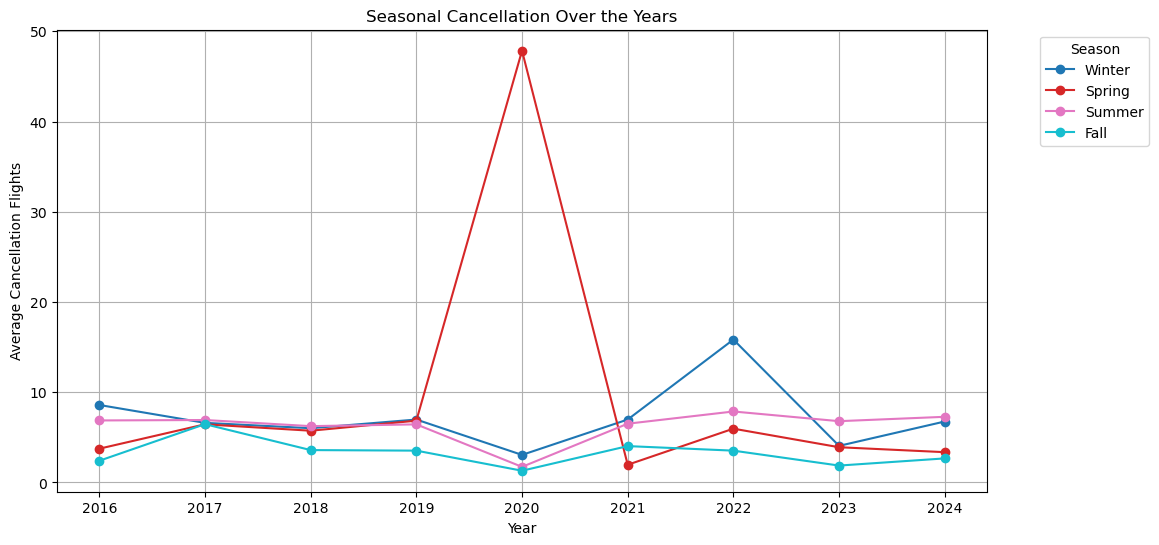

In [281]:
#line graph to show seasonal trend of cancellations
# Define month-to-season mapping
season_map = {
    12: "Winter", 1: "Winter", 2: "Winter",
    3: "Spring", 4: "Spring", 5: "Spring",
    6: "Summer", 7: "Summer", 8: "Summer",
    9: "Fall", 10: "Fall", 11: "Fall"
}

# Map each month to its season
df_cleaned["season"] = df_cleaned["month"].map(season_map)

# Group by year and season, then calculate the mean cancellations
df_seasonal = df_cleaned.groupby(["year", "season"])["arr_cancelled"].mean().unstack()

# Ensure seasons appear in order (Winter → Spring → Summer → Fall)
df_seasonal = df_seasonal[["Winter", "Spring", "Summer", "Fall"]]

# Plot with a different color palette
df_seasonal.plot(figsize=(12,6), colormap="tab10", marker="o")

# Customizing the plot
plt.title("Seasonal Cancellation Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Cancellation Flights")
plt.legend(title="Season", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)

# Show plot
plt.show()

##### This graph shows seasonal flight cancellations over the years from 2016 to 2024. Here’s a breakdown of key observations:
1.COVID-19 Disruption in 2020: The sharp spike in cancellations during the summer of 2020 is directly linked to the global impact of the COVID-19 pandemic. This period saw massive disruptions to air travel, causing a significant rise in cancellations, particularly in the summer season.

2.Winter of 2022 Surge: The increase in cancellations during the winter of 2022 highlights the impact of external factors such as adverse weather conditions or ongoing operational challenges, possibly aggravated by the effects of the pandemic on airline operations.

3.Stabilization Post-2020: After the dramatic spike in 2020, flight cancellations returned to more typical levels with occasional fluctuations, especially in summer and winter. The years 2023 and 2024 show a stable pattern of cancellations, reflecting a return to normalcy in air travel, albeit with some seasonal variability.




####  What are the Seasonal and yearly trends in Diversions?

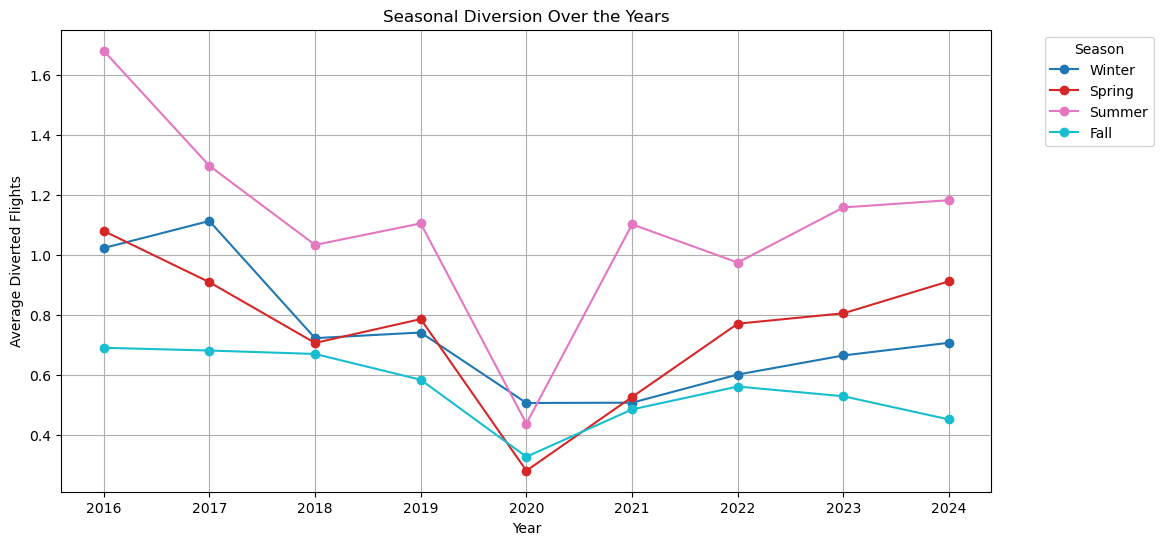

In [284]:
#line graph to show seasonal trend of diversions
# Define month-to-season mapping
season_map = {
    12: "Winter", 1: "Winter", 2: "Winter",
    3: "Spring", 4: "Spring", 5: "Spring",
    6: "Summer", 7: "Summer", 8: "Summer",
    9: "Fall", 10: "Fall", 11: "Fall"
}

# Map each month to its season
df_cleaned["season"] = df_cleaned["month"].map(season_map)

# Group by year and season, then calculate the mean cancellations
df_seasonal = df_cleaned.groupby(["year", "season"])["arr_diverted"].mean().unstack()

# Ensure seasons appear in order (Winter → Spring → Summer → Fall)
df_seasonal = df_seasonal[["Winter", "Spring", "Summer", "Fall"]]

# Plot with a different color palette
df_seasonal.plot(figsize=(12,6), colormap="tab10", marker="o")

# Customizing the plot
plt.title("Seasonal Diversion Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Diverted Flights")
plt.legend(title="Season", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)

# Show plot
plt.show()

##### 1. Decrease in Diversions Until 2020:
• From 2016 to 2020, there is a general decline in diverted flights across all seasons, with fall (purple line) showing the most significant drop.
• This could be due to improved flight planning, fewer extreme weather events, or other operational improvements.
##### 2. Sharp Drop in 2020:
• Diversions reach their lowest point around 2020, likely due to the COVID-19 pandemic reducing the number of flights overall. With fewer flights in operation, there were fewer diversions.
##### 3. Post-2020 Increase in Diversions:
• After 2020, diversions start increasing again across all seasons, though at different rates.
• Fall diversions (purple) show the most fluctuations, rising significantly after 2020 and remaining relatively high.
• Spring (red) also shows a steady increase in diversions from 2021 onward.
##### 4. 2023-2024 Stabilization:
• By 2023 and 2024, winter (blue) and summer (teal) diversions remain relatively stable.
• Spring and fall still show an increasing trend, suggesting more frequent diversions during these seasons.
Possible Reasons for Trends:
• Weather Conditions: Fall and spring might experience more unstable weather patterns, causing more diversions.
• Operational Adjustments: Airlines may have improved handling of diversions post-2020, leading to gradual increases rather than drastic spikes.
• Post-COVID Recovery: As air travel resumed after 2020, the number of diverted flights also rose proportionally.

#### Conclusion:
The data suggests that fall and spring tend to have higher diversion rates, with a notable dip during 2020 due to the pandemic. Since then, diversions have been increasing, possibly due to operational factors and seasonal weather variations


# D. How can airlines and airports optimise their operations to reduce delays and improve punctuality(Suggestions)?

### Main Causes: Following are the Main Causes for the Delays
1. Late Aircraft Delay
2. Carrier delay
3. NAS (National Aviation System) Delay
   
### Suggestions to Airlines: 

#### Late Aircraft Delays (Southwest Airlines - 46% & Indigo Partners - 39%):

Improve Scheduling: Use data analytics and machine learning to predict delays and adjust schedules accordingly. Adding buffer time for high-traffic routes and implementing real-time adjustments can minimize the impact of late arrivals and operational disruptions.

Efficient Turnaround: Automate ground operations, train specialized turnaround teams, and invest in modern equipment to speed up turnaround processes. Streamlining gate management and using real-time data can further improve efficiency.

#### Carrier Delays (Skywest Inc - 38% & JetBlue Airways - 36%):

Predictive Maintenance: Equip aircraft with IoT sensors and use predictive analytics to forecast potential issues, enabling proactive maintenance during off-peak times to avoid unplanned delays.

Resource Allocation: Use workforce management software to optimize ground staff scheduling and track equipment utilization. This ensures resources are available when needed, reducing turnaround delays.

Real-time Monitoring: Implement centralized dashboards and real-time flight monitoring tools to track operational conditions and adjust promptly to minimize delays.

#### NAS Delays (Spirit Airlines - 48% & Alaska Airlines - 40%):

Coordination with ATC: Share real-time data with ATC to adjust flight paths and departure times, improving communication and reducing delays due to airspace congestion.

Infrastructure Investment: Modernize runways, taxiways, and gate management systems to reduce congestion and improve the efficiency of takeoffs, landings, and turnarounds.

Advanced Traffic Management: Implement Performance-Based Navigation (PBN) for more efficient flight paths and better air traffic flow, reducing delays and improving fuel efficiency.

#### Suggestions to Airports:
#### Late Aircraft Delays: Higher at the Following Airports:
CLT (41%) – Charlotte Douglas International Airport (Domestic + International)

PHX (40%) – Phoenix Sky Harbor International Airport (Domestic + International)

LAS (39%) – McCarran International Airport (Domestic + International)

Quick Turnaround Processes: Streamline refueling, cleaning, and maintenance processes to minimize aircraft downtime and improve turnaround efficiency.

Gate Availability: Enhance gate management to reduce delays in boarding and disembarking, ensuring smooth transitions between flights.

#### Carrier Delays: Higher at the Following Airports:
SLC (39%) – Salt Lake City International Airport,Salt Lake City (Domestic + International)

MSP (35%) – Minneapolis-Saint Paul International Airport (Domestic + International)

DTW (35%) – Detroit Metropolitan Wayne County Airport (Domestic + International)

Crew Management: Improve crew scheduling systems to ensure timely crew availability and reduce delays.

Operational Efficiency: Optimize processes such as boarding, baggage handling, and fueling to minimize delays.

Coordination with Airlines: Enhance communication with airlines to promptly address and resolve carrier-specific delays.

#### National Aviation System (NAS) Delays: Higher at the Following Airports:
EWR (53%) – Newark Liberty International Airport,Newark, New Jersey, USA (Domestic + International)

LGA (46%) – LaGuardia Airpor,Queens, New York City, New York, USA (Primarily Domestic, Very few International flights)

SFO (45%) – San Francisco International Airport ,San Francisco, California, USA (Domestic + International)


Infrastructure Investments: Modernize and expand airport facilities to accommodate increased traffic and reduce congestion.

Traffic Flow Management: Implement advanced systems to optimize aircraft movements both on the ground and in the air, improving overall traffic flow efficiency


In [369]:
df_cleaned.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Parent_Company,Airport_State,date,season
0,2024,10,OH,PSA Airlines Inc.,SGF,"Springfield, MO: Springfield-Branson National",119.0,16.0,5.50,0.0,...,1575.0,716.0,0.0,111.0,0.0,748.0,American Airlines Group,Missouri,2024-10-01,Fall
1,2024,10,OH,PSA Airlines Inc.,SHV,"Shreveport, LA: Shreveport Regional",92.0,12.0,4.56,0.0,...,372.0,174.0,0.0,166.0,0.0,32.0,American Airlines Group,Louisiana,2024-10-01,Fall
2,2024,10,OH,PSA Airlines Inc.,SRQ,"Sarasota/Bradenton, FL: Sarasota/Bradenton Int...",31.0,3.0,0.40,0.0,...,86.0,9.0,0.0,1.0,0.0,76.0,American Airlines Group,Florida,2024-10-01,Fall
3,2024,10,OH,PSA Airlines Inc.,STL,"St. Louis, MO: St Louis Lambert International",115.0,15.0,6.87,0.0,...,1186.0,351.0,0.0,7.0,0.0,828.0,American Airlines Group,Missouri,2024-10-01,Fall
4,2024,10,OH,PSA Airlines Inc.,SYR,"Syracuse, NY: Syracuse Hancock International",15.0,4.0,1.42,0.0,...,162.0,62.0,0.0,27.0,0.0,73.0,American Airlines Group,New York,2024-10-01,Fall


In [371]:
df_cleaned.corr()

ValueError: could not convert string to float: 'OH'